In [65]:
import pandas as pd
import glob
import os
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import re
from collections import OrderedDict, defaultdict
import tensorflow as tf


In [66]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18


plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


In [67]:
colors = [(195/255,16/255,16/255),(234/255,205/255,35/255),(46/255,91/255,152/255),(241/255,110/255,25/255),(109/255,202/255,37/255),(105/255,72/255,111/255)]

# Read & Transform

In [68]:
d = {}
for f in glob.glob("/Users/deke/Desktop/MasterThesis/English out of domain logs uncertainty more seeds/*.csv"):
    #print(f)
    d[os.path.basename(f)] = pd.read_csv(f, header=0) # read in csv and store in dict of dfs
    d[os.path.basename(f)] = d[os.path.basename(f)].rename(columns={'Unnamed: 0': 'Abstain Fraction'})
    num_ensemble = re.findall(r'\d+', os.path.basename(f))[-1]
    d[os.path.basename(f)]["num_ensemble"] = int(num_ensemble)
    d[os.path.basename(f)]["method"] = os.path.basename(f)

In [69]:
d_german = {}
for f in glob.glob("/Users/deke/Desktop/MasterThesis/German out of domain logs uncertainty more seeds/*.csv"):
    #print(f)
    d_german[os.path.basename(f)] = pd.read_csv(f, header=0) # read in csv and store in dict of dfs
    d_german[os.path.basename(f)] = d_german[os.path.basename(f)].rename(columns={'Unnamed: 0': 'Abstain Fraction'})
    num_ensemble = re.findall(r'\d+', os.path.basename(f))[-1]
    d_german[os.path.basename(f)]["num_ensemble"] = int(num_ensemble)
    d_german[os.path.basename(f)]["method"] = os.path.basename(f)

In [70]:
key_MC_Dropout_0 = ["MC Dropout", "state0"]
key_MC_Dropout_21 = ["MC Dropout", "state21"]
key_MC_Dropout_42 = ["MC Dropout", "state42"]
key_MC_Dropout_99 = ["MC Dropout", "state99"]
key_MC_Dropout_365 = ["MC Dropout", "state365"]

key_Vanilla_0 = ["Vanilla", "state0"]
key_Vanilla_21 = ["Vanilla", "state21"]
key_Vanilla_42 = ["Vanilla", "state42"]
key_Vanilla_99 = ["Vanilla", "state99"]
key_Vanilla_365 = ["Vanilla", "state365"]

key_DeepEnsemble_0 = ["Deep Ensemble", "state0"]
key_DeepEnsemble_21 = ["Deep Ensemble", "state21"]
key_DeepEnsemble_42 = ["Deep Ensemble", "state42"]
key_DeepEnsemble_99 = ["Deep Ensemble", "state99"]
key_DeepEnsemble_365 = ["Deep Ensemble", "state365"]

key_Random_Class_0 = ["Random", "state0"]
key_Random_Class_21 = ["Random", "state21"]
key_Random_Class_42 = ["Random", "state42"]
key_Random_Class_99 = ["Random", "state99"]
key_Random_Class_365 = ["Random", "state365"]

In [71]:
def func(a):
    if "shifted_1_" in a.lower() or "combined_1_" in a.lower():
        return 1
    elif "shifted_3_" in a.lower() or "combined_3_" in a.lower():
        return 3
    elif "shifted_5_" in a.lower() or "combined_5_" in a.lower():
        return 5
    elif "shifted_10_" in a.lower() or "combined_10_" in a.lower():
        return 10
    elif "shifted_20_" in a.lower() or "combined_20_" in a.lower():
        return 20
    elif "shifted_30_" in a.lower() or "combined_30_" in a.lower():
        return 30
    elif "shifted_40_" in a.lower() or "combined_40_" in a.lower():
        return 40
    elif "shifted_50_" in a.lower() or "combined_50_" in a.lower():
        return 50
    elif "shifted_60_" in a.lower() or "combined_60_" in a.lower():
        return 60
    elif "shifted_70_" in a.lower() or "combined_70_" in a.lower():
        return 70
    elif "shifted_80_" in a.lower() or "combined_80_" in a.lower():
        return 80
    elif "shifted_90_" in a.lower() or "combined_90_" in a.lower():
        return 90
    elif "shifted_100_" in a.lower() or "combined_100_" in a.lower():
        return 100
    



In [72]:
d_list = [d,d_german]

In [73]:
def create_dfs(d_list, reduce):
    for e, d in enumerate(d_list):
        print(e)
        Vanilla_0 = []
        Vanilla_21 = []
        Vanilla_42 = []
        Vanilla_99 = []
        Vanilla_365 = []

        MCDropout_0 = []
        MCDropout_21 = []
        MCDropout_42 = []
        MCDropout_99 = []
        MCDropout_365 = []

        DeepEnsemble_0 = []
        DeepEnsemble_21 = []
        DeepEnsemble_42 = []
        DeepEnsemble_99 = []
        DeepEnsemble_365 = []

        Random_Class_0 = []
        Random_Class_21 = []
        Random_Class_42 = []
        Random_Class_99 = []
        Random_Class_365 = []


        for key, value in d.items():
            if all(x in key for x in key_Vanilla_0):
                Vanilla_0.append(value)
            elif all(x in key for x in key_Vanilla_21):
                Vanilla_21.append(value)
            elif all(x in key for x in key_Vanilla_42):
                Vanilla_42.append(value)
            elif all(x in key for x in key_Vanilla_99):
                Vanilla_99.append(value)
            elif all(x in key for x in key_Vanilla_365):
                Vanilla_365.append(value)
            elif all(x in key for x in key_Random_Class_0):
                Random_Class_0.append(value)
            elif all(x in key for x in key_Random_Class_21):
                Random_Class_21.append(value)
            elif all(x in key for x in key_Random_Class_42):
                Random_Class_42.append(value)
            elif all(x in key for x in key_Random_Class_99):
                Random_Class_99.append(value)
            elif all(x in key for x in key_Random_Class_365):
                Random_Class_365.append(value)
            elif all(x in key for x in key_DeepEnsemble_0):
                DeepEnsemble_0.append(value)
            elif all(x in key for x in key_DeepEnsemble_21):
                DeepEnsemble_21.append(value)
            elif all(x in key for x in key_DeepEnsemble_42):
                DeepEnsemble_42.append(value)
            elif all(x in key for x in key_DeepEnsemble_99):
                DeepEnsemble_99.append(value)
            elif all(x in key for x in key_DeepEnsemble_365):
                DeepEnsemble_365.append(value)
            elif all(x in key for x in key_MC_Dropout_0):
                MCDropout_0.append(value)
            elif all(x in key for x in key_MC_Dropout_21):
                MCDropout_21.append(value)
            elif all(x in key for x in key_MC_Dropout_42):
                MCDropout_42.append(value)
            elif all(x in key for x in key_MC_Dropout_99):
                MCDropout_99.append(value)
            elif all(x in key for x in key_MC_Dropout_365):
                MCDropout_365.append(value)

        MCDropout_df_0 = pd.concat(MCDropout_0).sort_values(by=['num_ensemble','Abstain Fraction'])
        MCDropout_df_21 = pd.concat(MCDropout_21).sort_values(by=['num_ensemble','Abstain Fraction'])
        MCDropout_df_42 = pd.concat(MCDropout_42).sort_values(by=['num_ensemble','Abstain Fraction'])
        MCDropout_df_99 = pd.concat(MCDropout_99).sort_values(by=['num_ensemble','Abstain Fraction'])
        MCDropout_df_365 = pd.concat(MCDropout_365).sort_values(by=['num_ensemble','Abstain Fraction'])

        MCDropout_df_0["K"] = MCDropout_df_0.method.apply(lambda x: func(x))
        MCDropout_df_21["K"] = MCDropout_df_21.method.apply(lambda x: func(x))
        MCDropout_df_42["K"] = MCDropout_df_42.method.apply(lambda x: func(x))
        MCDropout_df_99["K"] = MCDropout_df_99.method.apply(lambda x: func(x))
        MCDropout_df_365["K"] = MCDropout_df_365.method.apply(lambda x: func(x))

        DeepEnsemble_df_0 = pd.concat(DeepEnsemble_0).sort_values(by=['num_ensemble','Abstain Fraction'])
        DeepEnsemble_df_21 = pd.concat(DeepEnsemble_21).sort_values(by=['num_ensemble','Abstain Fraction'])
        DeepEnsemble_df_42 = pd.concat(DeepEnsemble_42).sort_values(by=['num_ensemble','Abstain Fraction'])
        DeepEnsemble_df_99 = pd.concat(DeepEnsemble_99).sort_values(by=['num_ensemble','Abstain Fraction'])
        DeepEnsemble_df_365 = pd.concat(DeepEnsemble_365).sort_values(by=['num_ensemble','Abstain Fraction'])

        DeepEnsemble_df_0["K"] = DeepEnsemble_df_0.method.apply(lambda x: func(x))
        DeepEnsemble_df_21["K"] = DeepEnsemble_df_21.method.apply(lambda x: func(x))
        DeepEnsemble_df_42["K"] = DeepEnsemble_df_42.method.apply(lambda x: func(x))
        DeepEnsemble_df_99["K"] = DeepEnsemble_df_99.method.apply(lambda x: func(x))
        DeepEnsemble_df_365["K"] = DeepEnsemble_df_365.method.apply(lambda x: func(x))

        Vanilla_df_0 = pd.concat(Vanilla_0).sort_values(by=['num_ensemble','Abstain Fraction'])
        Vanilla_df_21 = pd.concat(Vanilla_21).sort_values(by=['num_ensemble','Abstain Fraction'])
        Vanilla_df_42 = pd.concat(Vanilla_42).sort_values(by=['num_ensemble','Abstain Fraction'])
        Vanilla_df_99 = pd.concat(Vanilla_99).sort_values(by=['num_ensemble','Abstain Fraction'])
        Vanilla_df_365 = pd.concat(Vanilla_365).sort_values(by=['num_ensemble','Abstain Fraction'])

        Vanilla_df_0["K"] = Vanilla_df_0.method.apply(lambda x: func(x))
        Vanilla_df_21["K"] = Vanilla_df_21.method.apply(lambda x: func(x))
        Vanilla_df_42["K"] = Vanilla_df_42.method.apply(lambda x: func(x))
        Vanilla_df_99["K"] = Vanilla_df_99.method.apply(lambda x: func(x))
        Vanilla_df_365["K"] = Vanilla_df_365.method.apply(lambda x: func(x))

        Random_Class_df_0 = pd.concat(Random_Class_0).sort_values(by=['num_ensemble','Abstain Fraction'])
        Random_Class_df_21 = pd.concat(Random_Class_21).sort_values(by=['num_ensemble','Abstain Fraction'])
        Random_Class_df_42 = pd.concat(Random_Class_42).sort_values(by=['num_ensemble','Abstain Fraction'])
        Random_Class_df_99 = pd.concat(Random_Class_99).sort_values(by=['num_ensemble','Abstain Fraction'])
        Random_Class_df_365 = pd.concat(Random_Class_365).sort_values(by=['num_ensemble','Abstain Fraction'])

        Random_Class_df_0["K"] = Random_Class_df_0.method.apply(lambda x: func(x))
        Random_Class_df_21["K"] = Random_Class_df_21.method.apply(lambda x: func(x))
        Random_Class_df_42["K"] = Random_Class_df_42.method.apply(lambda x: func(x))
        Random_Class_df_99["K"] = Random_Class_df_99.method.apply(lambda x: func(x))
        Random_Class_df_365["K"] = Random_Class_df_365.method.apply(lambda x: func(x))

        if reduce=="mean":
            MCDropout_df_temp = pd.concat([MCDropout_df_0, MCDropout_df_21,MCDropout_df_42,MCDropout_df_99,MCDropout_df_365]).groupby(by=["num_ensemble","Abstain Fraction","K"], as_index=False).mean()
            DeepEnsemble_df_temp = pd.concat([DeepEnsemble_df_0, DeepEnsemble_df_21,DeepEnsemble_df_42,DeepEnsemble_df_99,DeepEnsemble_df_365]).groupby(by=["num_ensemble","Abstain Fraction","K"], as_index=False).mean()
            Vanilla_df_temp = pd.concat([Vanilla_df_0, Vanilla_df_21,Vanilla_df_42,Vanilla_df_99,Vanilla_df_365]).groupby(by=["num_ensemble","Abstain Fraction","K"], as_index=False).mean()
            Random_Class_df_temp = pd.concat([Random_Class_df_0, Random_Class_df_21,Random_Class_df_42,Random_Class_df_99,Random_Class_df_365]).groupby(by=["num_ensemble","Abstain Fraction","K"], as_index=False).mean()

            if e==0:
                MCDropout_df = MCDropout_df_temp
                DeepEnsemble_df = DeepEnsemble_df_temp
                Vanilla_df = Vanilla_df_temp
                Random_Class_df = Random_Class_df_temp
            elif e==1:
                MCDropout_df_german = MCDropout_df_temp
                DeepEnsemble_df_german = DeepEnsemble_df_temp
                Vanilla_df_german = Vanilla_df_temp
                Random_Class_df_german = Random_Class_df_temp  
                
        if reduce=="max":
            MCDropout_df_temp = pd.concat([MCDropout_df_0, MCDropout_df_21,MCDropout_df_42,MCDropout_df_99,MCDropout_df_365]).groupby(by=["num_ensemble","Abstain Fraction","K"], as_index=False).max()
            DeepEnsemble_df_temp = pd.concat([DeepEnsemble_df_0, DeepEnsemble_df_21,DeepEnsemble_df_42,DeepEnsemble_df_99,DeepEnsemble_df_365]).groupby(by=["num_ensemble","Abstain Fraction","K"], as_index=False).max()
            Vanilla_df_temp = pd.concat([Vanilla_df_0, Vanilla_df_21,Vanilla_df_42,Vanilla_df_99,Vanilla_df_365]).groupby(by=["num_ensemble","Abstain Fraction","K"], as_index=False).max()
            Random_Class_df_temp = pd.concat([Random_Class_df_0, Random_Class_df_21,Random_Class_df_42,Random_Class_df_99,Random_Class_df_365]).groupby(by=["num_ensemble","Abstain Fraction","K"], as_index=False).max()

            if e==0:
                MCDropout_df = MCDropout_df_temp.add_prefix("max_")
                DeepEnsemble_df = DeepEnsemble_df_temp.add_prefix("max_")
                Vanilla_df = Vanilla_df_temp.add_prefix("max_")
                Random_Class_df = Random_Class_df_temp.add_prefix("max_")
            elif e==1:
                MCDropout_df_german = MCDropout_df_temp.add_prefix("max_")
                DeepEnsemble_df_german = DeepEnsemble_df_temp.add_prefix("max_")
                Vanilla_df_german = Vanilla_df_temp.add_prefix("max_")
                Random_Class_df_german = Random_Class_df_temp.add_prefix("max_")
                
        if reduce=="min":
            MCDropout_df_temp = pd.concat([MCDropout_df_0, MCDropout_df_21,MCDropout_df_42,MCDropout_df_99,MCDropout_df_365]).groupby(by=["num_ensemble","Abstain Fraction","K"], as_index=False).min()
            DeepEnsemble_df_temp = pd.concat([DeepEnsemble_df_0, DeepEnsemble_df_21,DeepEnsemble_df_42,DeepEnsemble_df_99,DeepEnsemble_df_365]).groupby(by=["num_ensemble","Abstain Fraction","K"], as_index=False).min()
            Vanilla_df_temp = pd.concat([Vanilla_df_0, Vanilla_df_21,Vanilla_df_42,Vanilla_df_99,Vanilla_df_365]).groupby(by=["num_ensemble","Abstain Fraction","K"], as_index=False).min()
            Random_Class_df_temp = pd.concat([Random_Class_df_0, Random_Class_df_21,Random_Class_df_42,Random_Class_df_99,Random_Class_df_365]).groupby(by=["num_ensemble","Abstain Fraction","K"], as_index=False).min()

            if e==0:
                MCDropout_df = MCDropout_df_temp.add_prefix("min_")
                DeepEnsemble_df = DeepEnsemble_df_temp.add_prefix("min_")
                Vanilla_df = Vanilla_df_temp.add_prefix("min_")
                Random_Class_df = Random_Class_df_temp.add_prefix("min_")
            elif e==1:
                MCDropout_df_german = MCDropout_df_temp.add_prefix("min_")
                DeepEnsemble_df_german = DeepEnsemble_df_temp.add_prefix("min_")
                Vanilla_df_german = Vanilla_df_temp.add_prefix("min_")
                Random_Class_df_german = Random_Class_df_temp.add_prefix("min_")

                
    return MCDropout_df, DeepEnsemble_df, Vanilla_df, Random_Class_df, MCDropout_df_german, DeepEnsemble_df_german, Vanilla_df_german, Random_Class_df_german

In [74]:
##Mean

In [75]:
MCDropout_df, DeepEnsemble_df, Vanilla_df, Random_Class_df, MCDropout_df_german, DeepEnsemble_df_german, Vanilla_df_german, Random_Class_df_german = create_dfs(d_list=d_list, reduce="mean")


0
1


In [76]:
##Max

In [77]:
MCDropout_df_max, DeepEnsemble_df_max, Vanilla_df_max, Random_Class_df_max, MCDropout_df_german_max, DeepEnsemble_df_german_max, Vanilla_df_german_max, Random_Class_df_german_max=create_dfs(d_list=d_list, reduce="max")


0
1


In [78]:
##Min

In [79]:
MCDropout_df_min, DeepEnsemble_df_min, Vanilla_df_min, Random_Class_df_min, MCDropout_df_german_min, DeepEnsemble_df_german_min, Vanilla_df_german_min, Random_Class_df_german_min = create_dfs(d_list=d_list, reduce="min")


0
1


In [80]:
MCDropout_df_german

,num_ensemble,Abstain Fraction,K,ECE,BRIER,CalibAUROC Softmax,CalibAUROC Variance,CalibAUROC BALD,CalibAUROC Class,CalibAUROC Random,...,AbstainPrecision_Softmax,AbstainPrecision_Class,AbstainPrecision_Random,AbstainPrecision_Variance,AbstainPrecision_BALD,AbstainRecall_Softmax,AbstainRecall_Class,AbstainRecall_Random,AbstainRecall_Variance,AbstainRecall_BALD
0,3,0.0,1,NaN,NaN,0.641243,0.591048,0.621208,0.569804,0.497569,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,3,0.0,3,NaN,NaN,0.577676,0.556408,0.575208,0.533306,0.498891,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,3,0.0,5,NaN,NaN,0.552728,0.539953,0.555039,0.520612,0.496968,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,3,0.0,10,NaN,NaN,0.526629,0.529889,0.539067,0.520335,0.498549,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
4,3,0.0,20,NaN,NaN,0.511452,0.524180,0.531119,0.524717,0.499410,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31351,100,1.0,60,NaN,NaN,0.494201,0.520224,0.525840,0.517930,0.499189,...,0.446121,0.446121,0.446121,0.446121,0.446121,1.0,0.446121,0.446121,1.0,1.0
31352,100,1.0,70,NaN,NaN,0.490692,0.520567,0.522681,0.520803,0.500550,...,0.404461,0.404461,0.404461,0.404461,0.404461,1.0,0.404461,0.404461,1.0,1.0
31353,100,1.0,80,NaN,NaN,0.487967,0.520843,0.519440,0.520325,0.502043,...,0.364998,0.364998,0.364998,0.364998,0.364998,1.0,0.364998,0.364998,1.0,1.0
31354,100,1.0,90,NaN,NaN,0.484670,0.520373,0.516351,0.518020,0.501718,...,0.327968,0.327968,0.327968,0.327968,0.327968,1.0,0.327968,0.327968,1.0,1.0


In [81]:
MCDropout_df = pd.concat([MCDropout_df,MCDropout_df_max,MCDropout_df_min],axis=1)
DeepEnsemble_df = pd.concat([DeepEnsemble_df,DeepEnsemble_df_max,DeepEnsemble_df_min],axis=1)
Vanilla_df = pd.concat([Vanilla_df,Vanilla_df_max,Vanilla_df_min],axis=1)
Random_Class_df = pd.concat([Random_Class_df,Random_Class_df_max,Random_Class_df_min],axis=1)

MCDropout_df_german = pd.concat([MCDropout_df_german, MCDropout_df_german_max,MCDropout_df_german_min],axis=1)
DeepEnsemble_df_german = pd.concat([DeepEnsemble_df_german, DeepEnsemble_df_german_max,DeepEnsemble_df_german_min],axis=1)
Vanilla_df_german = pd.concat([Vanilla_df_german, Vanilla_df_german_max,Vanilla_df_german_min],axis=1)
Random_Class_df_german = pd.concat([Random_Class_df_german, Random_Class_df_german_max,Random_Class_df_german_min],axis=1)



In [82]:
MCDropout_df["num_ensemble"] = MCDropout_df["num_ensemble"].astype(int)
DeepEnsemble_df["num_ensemble"] = DeepEnsemble_df["num_ensemble"].astype(int)
Vanilla_df["num_ensemble"] = Vanilla_df["num_ensemble"].astype(int)
Random_Class_df["num_ensemble"] = Random_Class_df["num_ensemble"].astype(int)

In [83]:
MCDropout_df_german["num_ensemble"] = MCDropout_df_german["num_ensemble"].astype(int)
DeepEnsemble_df_german["num_ensemble"] = DeepEnsemble_df_german["num_ensemble"].astype(int)
Vanilla_df_german["num_ensemble"] = Vanilla_df_german["num_ensemble"].astype(int)
Random_Class_df_german["num_ensemble"] = Random_Class_df_german["num_ensemble"].astype(int)

In [84]:
MCDropout_df.sort_values(["num_ensemble","K","Abstain Fraction"], inplace=True)
DeepEnsemble_df.sort_values(["num_ensemble","K","Abstain Fraction"], inplace=True)
Vanilla_df.sort_values(["num_ensemble","K","Abstain Fraction"], inplace=True)
Random_Class_df.sort_values(["num_ensemble","K","Abstain Fraction"], inplace=True)

In [85]:
MCDropout_df_german.sort_values(["num_ensemble","K","Abstain Fraction"], inplace=True)
DeepEnsemble_df_german.sort_values(["num_ensemble","K","Abstain Fraction"], inplace=True)
Vanilla_df_german.sort_values(["num_ensemble","K","Abstain Fraction"], inplace=True)
Random_Class_df_german.sort_values(["num_ensemble","K","Abstain Fraction"], inplace=True)

In [86]:
MCDropout_df["K"] = MCDropout_df["K"].astype(int)
DeepEnsemble_df["K"] = DeepEnsemble_df["K"].astype(int)
Vanilla_df["K"] = Vanilla_df["K"].astype(int)
Random_Class_df["K"] = Random_Class_df["K"].astype(int)

MCDropout_df["K"] = MCDropout_df["K"].astype(int)
DeepEnsemble_df["K"] = DeepEnsemble_df["K"].astype(int)
Vanilla_df["K"] = Vanilla_df["K"].astype(int)
Random_Class_df["K"] = Random_Class_df["K"].astype(int)

MCDropout_df["K"] = MCDropout_df["K"].astype(int)
DeepEnsemble_df["K"] = DeepEnsemble_df["K"].astype(int)
Vanilla_df["K"] = Vanilla_df["K"].astype(int)
Random_Class_df["K"] = Random_Class_df["K"].astype(int)

In [87]:
MCDropout_df_german["K"] = MCDropout_df_german["K"].astype(int)
DeepEnsemble_df_german["K"] = DeepEnsemble_df_german["K"].astype(int)
Vanilla_df_german["K"] = Vanilla_df_german["K"].astype(int)
Random_Class_df_german["K"] = Random_Class_df_german["K"].astype(int)

In [88]:
MCDropout_df_combined = MCDropout_df
DeepEnsemble_df_combined = DeepEnsemble_df
Vanilla_df_combined = Vanilla_df
Random_Class_df_combined = Random_Class_df

In [89]:
MCDropout_df_combined_german = MCDropout_df_german
DeepEnsemble_df_combined_german = DeepEnsemble_df_german
Vanilla_df_combined_german = Vanilla_df_german
Random_Class_df_combined_german = Random_Class_df_german

In [90]:
groupbyobject_MC = MCDropout_df_combined.groupby("K")
groupbyobject_DE = DeepEnsemble_df_combined.groupby("K")
groupbyobject_VA = Vanilla_df_combined.groupby("K")
groupbyobject_RC = Random_Class_df_combined.groupby("K")
groups = [1,3,5,10,20,30,40,50,60,70,80,90,100]
MC_Dropout_ensembles = [3,5,10,20,30,40,50,60,70,80,90,100]
Deep_ensembles = [3,4,5,6,7,8,9,10]
MC_Dropout_dfs_combined = {1:defaultdict(dict),3:defaultdict(dict),5:defaultdict(dict),10:defaultdict(dict),20:defaultdict(dict)
       ,30:defaultdict(dict),40:defaultdict(dict),50:defaultdict(dict),60:defaultdict(dict),70:defaultdict(dict)
       ,80:defaultdict(dict),90:defaultdict(dict),100:defaultdict(dict)}

Deep_Ensemble_dfs_combined = {1:defaultdict(dict),3:defaultdict(dict),5:defaultdict(dict),10:defaultdict(dict),20:defaultdict(dict)
       ,30:defaultdict(dict),40:defaultdict(dict),50:defaultdict(dict),60:defaultdict(dict),70:defaultdict(dict)
       ,80:defaultdict(dict),90:defaultdict(dict),100:defaultdict(dict)}

Vanilla_dfs_combined = {1:None,3:None,5:None,10:None,20:None
       ,30:None,40:None,50:None,60:None,70:None
       ,80:None,90:None,100:None}

Random_Class_dfs_combined = {1:None,3:None,5:None,10:None,20:None
       ,30:None,40:None,50:None,60:None,70:None
       ,80:None,90:None,100:None}

for i in groups:
    groupbyobject_MC_ensemble = groupbyobject_MC.get_group(i).groupby("num_ensemble")
    groupbyobject_DE_ensemble = groupbyobject_DE.get_group(i).groupby("num_ensemble")
    Vanilla_dfs_combined[i] = groupbyobject_VA.get_group(i)
    Random_Class_dfs_combined[i] = groupbyobject_RC.get_group(i)
    for j in MC_Dropout_ensembles:
        #print(dfs)
        MC_Dropout_dfs_combined[i][j] = groupbyobject_MC_ensemble.get_group(j)
    for f in Deep_ensembles:
        Deep_Ensemble_dfs_combined[i][f] = groupbyobject_DE_ensemble.get_group(f)
    





In [91]:
groupbyobject_MC_german = MCDropout_df_combined_german.groupby("K")
groupbyobject_DE_german = DeepEnsemble_df_combined_german.groupby("K")
groupbyobject_VA_german = Vanilla_df_combined_german.groupby("K")
groupbyobject_RC_german = Random_Class_df_combined_german.groupby("K")
groups_german = [1,3,5,10,20,30,40,50,60,70,80,90,100]
MC_Dropout_ensembles_german = [3,5,10,20,30,40,50,60,70,80,90,100]
Deep_ensembles_german = [3,4,5,6,7,8,9,10]
MC_Dropout_dfs_combined_german = {1:defaultdict(dict),3:defaultdict(dict),5:defaultdict(dict),10:defaultdict(dict),20:defaultdict(dict)
       ,30:defaultdict(dict),40:defaultdict(dict),50:defaultdict(dict),60:defaultdict(dict),70:defaultdict(dict)
       ,80:defaultdict(dict),90:defaultdict(dict),100:defaultdict(dict)}

Deep_Ensemble_dfs_combined_german = {1:defaultdict(dict),3:defaultdict(dict),5:defaultdict(dict),10:defaultdict(dict),20:defaultdict(dict)
       ,30:defaultdict(dict),40:defaultdict(dict),50:defaultdict(dict),60:defaultdict(dict),70:defaultdict(dict)
       ,80:defaultdict(dict),90:defaultdict(dict),100:defaultdict(dict)}

Vanilla_dfs_combined_german = {1:None,3:None,5:None,10:None,20:None
       ,30:None,40:None,50:None,60:None,70:None
       ,80:None,90:None,100:None}

Random_Class_dfs_combined_german = {1:None,3:None,5:None,10:None,20:None
       ,30:None,40:None,50:None,60:None,70:None
       ,80:None,90:None,100:None}

for i in groups:
    groupbyobject_MC_ensemble_german = groupbyobject_MC_german.get_group(i).groupby("num_ensemble")
    groupbyobject_DE_ensemble_german = groupbyobject_DE_german.get_group(i).groupby("num_ensemble")
    Vanilla_dfs_combined_german[i] = groupbyobject_VA_german.get_group(i)
    Random_Class_dfs_combined_german[i] = groupbyobject_RC_german.get_group(i)
    for j in MC_Dropout_ensembles_german:
        #print(dfs)
        MC_Dropout_dfs_combined_german[i][j] = groupbyobject_MC_ensemble_german.get_group(j)
    for f in Deep_ensembles:
        Deep_Ensemble_dfs_combined_german[i][f] = groupbyobject_DE_ensemble_german.get_group(f)

In [92]:
def function_to_split(hand,labl,dividor):

    Hand_L=[]
    Hand_M=[]
    Labl_L=[]
    Labl_M=[]

    for h,l in zip(hand,labl):
        co=h.get_color()
        ls=h.get_linestyle()
        lw=h.get_linewidth()
        mk=h.get_marker()
        mew=h.get_markeredgewidth()
        ms=h.get_markersize()

        LABS=l.split(dividor)

        if len(LABS) != 2:
            print('Split Legends Error: Only exactly 1 Dividor is accepted.')
            print ('Currently ' + str(len(LABS)-1) + ' dividors were given')
            return hand,labl

        #Line and Color
        LICO = plt.Line2D((0,1),(0,0), color=co, marker='',linewidth=lw)
        #Marker
        MARK = plt.Line2D((0,1),(0,0), color='k', marker=mk, markeredgewidth=mew, markersize=ms, linestyle=ls)

        if LABS[0] not in Labl_L:
            Hand_L.append(LICO)
            Labl_L.append(LABS[0])

        if LABS[1] not in Labl_M:
            Hand_M.append(MARK)
            Labl_M.append(LABS[1])

    return Hand_L+Hand_M,Labl_L+Labl_M

# Accuracy Reject

In [43]:
def plot_accuracy_text(K=[1,10,50,100], mc_dropout_ensembles=100, deep_ensembles=10):
    fig = plt.figure(figsize=(20, 20))
    fig.tight_layout()

    
    plt.subplot(3, 2, 1)
    plt.plot(MC_Dropout_dfs_combined[1][mc_dropout_ensembles]["Abstain Fraction"][:-1], MC_Dropout_dfs_combined[1][mc_dropout_ensembles]["AbstainAccuracy_Softmax_Acc"][:-1], color=colors[0], label="K="+str(MC_Dropout_dfs_combined[1][mc_dropout_ensembles]["K"].iloc[0]) + "& MC Dropout", linestyle="-")
    plt.plot(Deep_Ensemble_dfs_combined[1][deep_ensembles]["Abstain Fraction"][:-1], Deep_Ensemble_dfs_combined[1][deep_ensembles]["AbstainAccuracy_Softmax_Acc"][:-1], color=colors[0], label= "K=" +str(Deep_Ensemble_dfs_combined[1][deep_ensembles]["K"].iloc[0]) + "& Deep Ensemble", linestyle="--")
    plt.plot(Vanilla_dfs_combined[1]["Abstain Fraction"], Vanilla_dfs_combined[1]["AbstainAccuracy_Softmax_Acc"], color=colors[0], label="K="+str(Vanilla_dfs_combined[1]["K"].iloc[0]) + "& Vanilla", linestyle=":")
    plt.plot(Random_Class_dfs_combined[1]["Abstain Fraction"], Random_Class_dfs_combined[1]["AbstainAccuracy_Random_Acc"], color=colors[0], label="K= "+str(Random_Class_dfs_combined[1]["K"].iloc[0])+"& Random", linestyle="-.")
    plt.title("English")
    #plt.ylabel('Top K Model Accuracy')

           
    plt.subplot(3, 2, 2)
    plt.plot(MC_Dropout_dfs_combined_german[1][mc_dropout_ensembles]["Abstain Fraction"][:-1], MC_Dropout_dfs_combined_german[1][mc_dropout_ensembles]["AbstainAccuracy_Softmax_Acc"][:-1], color=colors[0], label="K="+str(MC_Dropout_dfs_combined_german[1][mc_dropout_ensembles]["K"].iloc[0]) + "& MC Dropout", linestyle="-")
    plt.plot(Deep_Ensemble_dfs_combined_german[1][deep_ensembles]["Abstain Fraction"][:-1], Deep_Ensemble_dfs_combined_german[1][deep_ensembles]["AbstainAccuracy_Softmax_Acc"][:-1], color=colors[0], label= "K=" +str(Deep_Ensemble_dfs_combined_german[1][deep_ensembles]["K"].iloc[0]) + "& Deep Ensemble", linestyle="--")
    plt.plot(Vanilla_dfs_combined_german[1]["Abstain Fraction"], Vanilla_dfs_combined_german[1]["AbstainAccuracy_Softmax_Acc"], color=colors[0], label="K="+str(Vanilla_dfs_combined_german[1]["K"].iloc[0]) + "& Vanilla", linestyle=":")
    plt.plot(Vanilla_dfs_combined_german[1]["Abstain Fraction"], Vanilla_dfs_combined_german[1]["AbstainAccuracy_Random_Acc"], color=colors[0], label="K="+str(Vanilla_dfs_combined_german[1]["K"].iloc[0])+ "& Random", linestyle="-.")
    plt.title("German")
    
    plt.subplot(3, 2, 3)
    for i, x in enumerate(K):
        plt.plot(MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["Abstain Fraction"][:-1], MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["AbstainAccuracy_Softmax_Acc"][:-1], color=colors[i], label="K="+str(MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["K"].iloc[0]) + "& MC Dropout", linestyle="-")
        plt.plot(Deep_Ensemble_dfs_combined[x][deep_ensembles]["Abstain Fraction"][:-1], Deep_Ensemble_dfs_combined[x][deep_ensembles]["AbstainAccuracy_Softmax_Acc"][:-1], color=colors[i], label= "K=" +str(Deep_Ensemble_dfs_combined[x][deep_ensembles]["K"].iloc[0]) + "& Deep Ensemble", linestyle="--")
        plt.plot(Vanilla_dfs_combined[x]["Abstain Fraction"], Vanilla_dfs_combined[x]["AbstainAccuracy_Softmax_Acc"], color=colors[i], label="K="+str(Vanilla_dfs_combined[x]["K"].iloc[0]) + "& Vanilla", linestyle=":")
        #plt.ylabel('Top K Model Accuracy')
           
    plt.subplot(3, 2, 4)
    for i, x in enumerate(K):
        plt.plot(MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["Abstain Fraction"][:-1], MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["AbstainAccuracy_Softmax_Acc"][:-1], color=colors[i], label="K="+str(MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["K"].iloc[0]) + "& MC Dropout", linestyle="-")
        plt.plot(Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["Abstain Fraction"][:-1], Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["AbstainAccuracy_Softmax_Acc"][:-1], color=colors[i], label= "K=" +str(Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["K"].iloc[0]) + "& Deep Ensemble", linestyle="--")
        plt.plot(Vanilla_dfs_combined_german[x]["Abstain Fraction"], Vanilla_dfs_combined_german[x]["AbstainAccuracy_Softmax_Acc"], color=colors[i], label="K="+str(Vanilla_dfs_combined_german[x]["K"].iloc[0]) + "& Vanilla", linestyle=":")
         
    plt.subplot(3, 2, 5)
    for i, x in enumerate(K):
        plt.plot(MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["Abstain Fraction"], MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"], color=colors[i], label="K=" +str(MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["K"].iloc[0]) + "& MC Dropout", linestyle="-")
        plt.plot(Deep_Ensemble_dfs_combined[x][deep_ensembles]["Abstain Fraction"], Deep_Ensemble_dfs_combined[x][deep_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"], color=colors[i], label= "K="+str(Deep_Ensemble_dfs_combined[x][deep_ensembles]["K"].iloc[0]) + "& Deep Ensemble", linestyle="--")
        plt.plot(Vanilla_dfs_combined[x]["Abstain Fraction"], Vanilla_dfs_combined[x]["AbstainAccuracy_Softmax_CombinedAcc"], color=colors[i], label="K="+str(Vanilla_dfs_combined[x]["K"].iloc[0]) + "& Vanilla", linestyle=":")
        #plt.ylabel('Top K  Combined Accuracy')
        #plt.xlabel('Abstain Fraction')
        
    plt.subplot(3, 2, 6)
    for i, x in enumerate(K):
        plt.plot(MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["Abstain Fraction"], MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"], color=colors[i], label="K=" +str(MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["K"].iloc[0]) + "& MC Dropout", linestyle="-")
        plt.plot(Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["Abstain Fraction"], Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"], color=colors[i], label= "K="+str(Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["K"].iloc[0]) + "& Deep Ensemble", linestyle="--")
        plt.plot(Vanilla_dfs_combined_german[x]["Abstain Fraction"], Vanilla_dfs_combined_german[x]["AbstainAccuracy_Softmax_CombinedAcc"], color=colors[i], label="K="+str(Vanilla_dfs_combined_german[x]["K"].iloc[0]) + "& Vanilla", linestyle=":")
        #plt.xlabel('Abstain Fraction')
     
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    hand, labl = function_to_split(lines,labels,'&')
    
    #print(hand)

    keep_indices = list(range(10))
    lines = [lines[i] for i in keep_indices]
    labels = [labels[i] for i in keep_indices]

    fig.legend(hand, labl, loc='lower left', bbox_to_anchor=(0.075,0.05), ncol=len(hand), bbox_transform=fig.transFigure)
    #fig.savefig("Accuracy-Reject Curves OOD.pdf")
    
    fig.text(0.5, 0.09, 'Abstain Fraction', ha='center')
    fig.text(0.07, 0.5, 'Top K  Combined Accuracy', va='center', rotation='vertical')

    #fig.savefig('Accuracy-Reject Curves Zero-Shot.pdf')



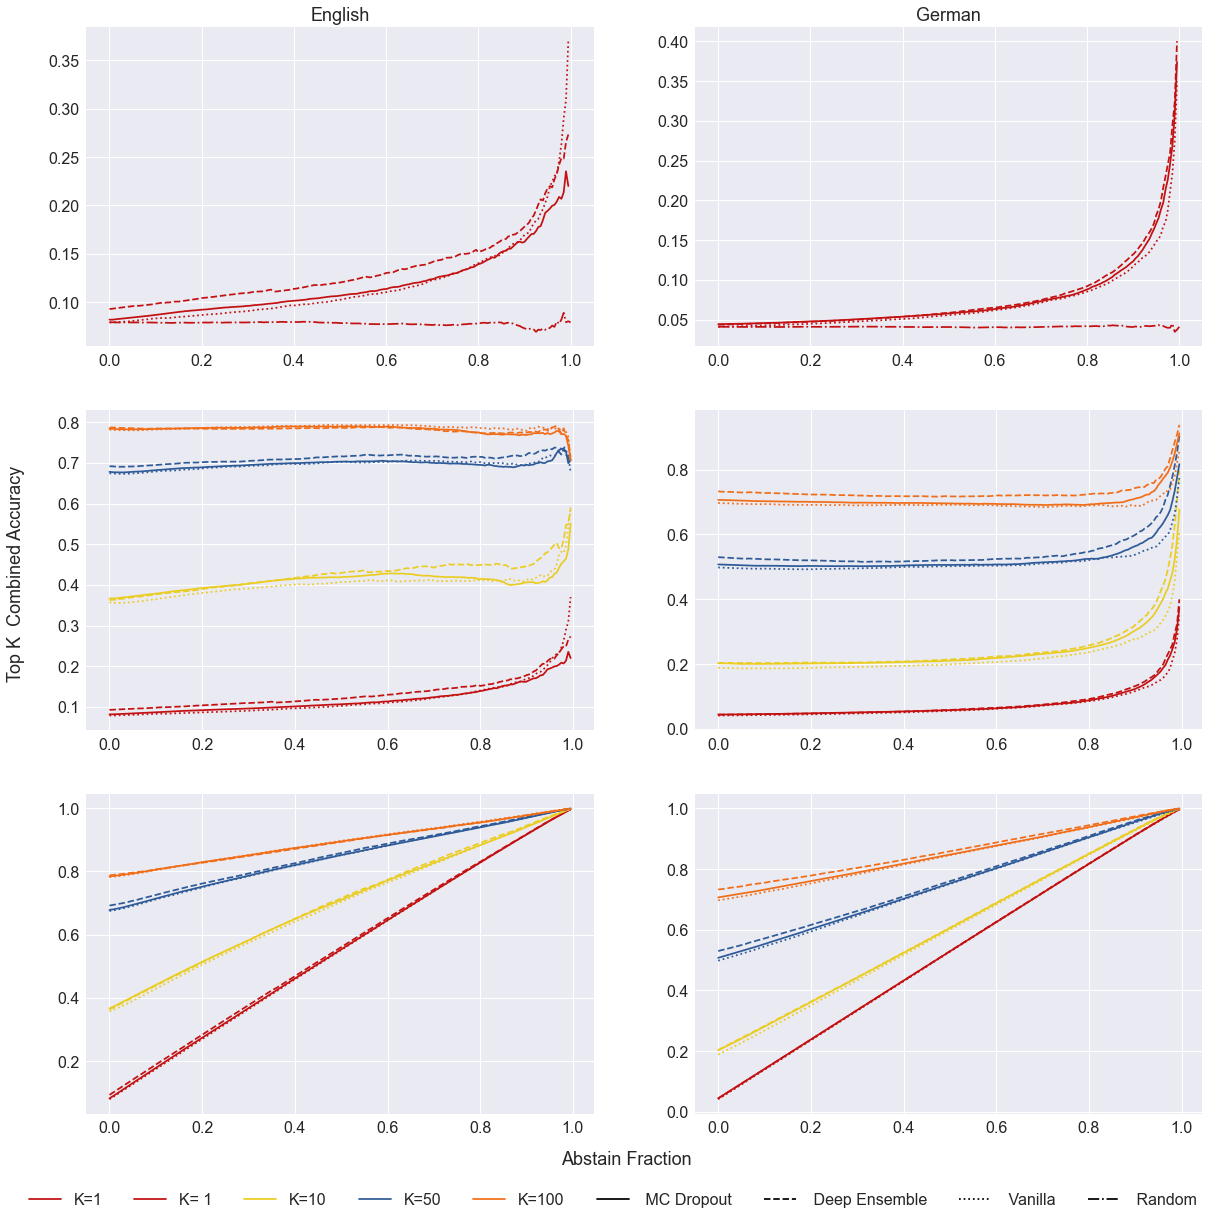

In [44]:
plot_accuracy_text()

In [43]:
def plot_accuracy_text_diff(K=[1,10,50,100], mc_dropout_ensembles=100, deep_ensembles=10):
    fig = plt.figure(figsize=(20, 15))
    fig.tight_layout()
    
    plt.subplot(2, 2, 1)
    for i, x in enumerate(K):
        baseline = Vanilla_dfs_combined[x]["AbstainAccuracy_Softmax_CombinedAcc"][:-1].reset_index(drop=True)
        plt.plot(Vanilla_dfs_combined[x]["Abstain Fraction"][:-1], Vanilla_dfs_combined[x]["AbstainAccuracy_Softmax_CombinedAcc"][:-1].reset_index(drop=True)-baseline, color="grey", label="K=All"+  "& Vanilla", linestyle=":")
        plt.plot(MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["Abstain Fraction"][:-1], MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"][:-1].reset_index(drop=True) - baseline, color=colors[i], label="K="+str(MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["K"].iloc[0]) + "& MC Dropout", linestyle="-")
        plt.plot(Deep_Ensemble_dfs_combined[x][deep_ensembles]["Abstain Fraction"][:-1], Deep_Ensemble_dfs_combined[x][deep_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"][:-1].reset_index(drop=True)-baseline, color=colors[i], label= "K=" +str(Deep_Ensemble_dfs_combined[x][deep_ensembles]["K"].iloc[0]) + "& Deep Ensemble", linestyle="--")

        plt.title("Test Dataset: English")
        plt.ylabel('Difference in Top K Combined Accuracy')
        #plt.xlabel('Abstain Fraction')

           
    plt.subplot(2, 2, 2)
    for i, x in enumerate(K):
        baseline = Vanilla_dfs_combined_german[x]["AbstainAccuracy_Softmax_CombinedAcc"][:-1].reset_index(drop=True)
        plt.plot(MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["Abstain Fraction"][:-1], MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"][:-1].reset_index(drop=True) - baseline, color=colors[i], label="K="+str(MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["K"].iloc[0]) + "& MC Dropout", linestyle="-")
        plt.plot(Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["Abstain Fraction"][:-1], Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"][:-1].reset_index(drop=True) - baseline, color=colors[i], label= "K=" +str(Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["K"].iloc[0]) + "& Deep Ensemble", linestyle="--")
        plt.plot(Vanilla_dfs_combined_german[x]["Abstain Fraction"][:-1], Vanilla_dfs_combined_german[x]["AbstainAccuracy_Softmax_CombinedAcc"][:-1].reset_index(drop=True) - baseline, color="grey", label="K=All" + "& Vanilla", linestyle=":")
        plt.title("Test Dataset: German")

         
    plt.subplot(2, 2, 3)
    for i, x in enumerate(K):
        plt.plot(MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["Abstain Fraction"][:-1], MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"][:-1].reset_index(drop=True), color=colors[i], label="K=" +str(MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["K"].iloc[0]) + "& MC Dropout", linestyle="-")
        plt.plot(Deep_Ensemble_dfs_combined[x][deep_ensembles]["Abstain Fraction"][:-1], Deep_Ensemble_dfs_combined[x][deep_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"][:-1].reset_index(drop=True), color=colors[i], label= "K="+str(Deep_Ensemble_dfs_combined[x][deep_ensembles]["K"].iloc[0]) + "& Deep Ensemble", linestyle="--")
        plt.plot(Vanilla_dfs_combined[x]["Abstain Fraction"][:-1], Vanilla_dfs_combined[x]["AbstainAccuracy_Softmax_CombinedAcc"][:-1].reset_index(drop=True), color=colors[i], label="K="+str(Vanilla_dfs_combined[x]["K"].iloc[0]) + "& Vanilla", linestyle=":")
        plt.ylabel('Top K Combined Accuracy')
        #plt.xlabel('Abstain Fraction')
        
    plt.subplot(2, 2, 4)
    for i, x in enumerate(K):
        plt.plot(MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["Abstain Fraction"][:-1], MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"][:-1].reset_index(drop=True), color=colors[i], label="K=" +str(MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["K"].iloc[0]) + "& MC Dropout", linestyle="-")
        plt.plot(Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["Abstain Fraction"][:-1], Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"][:-1].reset_index(drop=True), color=colors[i], label= "K="+str(Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["K"].iloc[0]) + "& Deep Ensemble", linestyle="--")
        plt.plot(Vanilla_dfs_combined_german[x]["Abstain Fraction"][:-1], Vanilla_dfs_combined_german[x]["AbstainAccuracy_Softmax_CombinedAcc"][:-1].reset_index(drop=True), color=colors[i], label="K="+str(Vanilla_dfs_combined_german[x]["K"].iloc[0]) + "& Vanilla", linestyle=":")
        #plt.xlabel('Abstain Fraction')
   
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    hand, labl = function_to_split(lines,labels,'&')
    
    print(labels)

    keep_indices = list(range(10))
    lines = [lines[i] for i in keep_indices]
    labels = [labels[i] for i in keep_indices]


    fig.legend(hand, labl, loc='lower left', bbox_to_anchor=(0.15,0.04), ncol=len(hand), bbox_transform=fig.transFigure)
    
    fig.text(0.5, 0.08, 'Abstain Fraction', ha='center')
    #fig.text(0.07, 0.5, 'Top K  Combined Accuracy', va='center', rotation='vertical')

    fig.savefig('Accuracy-Reject Curves Zero-Shot.pdf')


['K=All& Vanilla', 'K=1& MC Dropout', 'K=1& Deep Ensemble', 'K=All& Vanilla', 'K=10& MC Dropout', 'K=10& Deep Ensemble', 'K=All& Vanilla', 'K=50& MC Dropout', 'K=50& Deep Ensemble', 'K=All& Vanilla', 'K=100& MC Dropout', 'K=100& Deep Ensemble', 'K=1& MC Dropout', 'K=1& Deep Ensemble', 'K=All& Vanilla', 'K=10& MC Dropout', 'K=10& Deep Ensemble', 'K=All& Vanilla', 'K=50& MC Dropout', 'K=50& Deep Ensemble', 'K=All& Vanilla', 'K=100& MC Dropout', 'K=100& Deep Ensemble', 'K=All& Vanilla', 'K=1& MC Dropout', 'K=1& Deep Ensemble', 'K=1& Vanilla', 'K=10& MC Dropout', 'K=10& Deep Ensemble', 'K=10& Vanilla', 'K=50& MC Dropout', 'K=50& Deep Ensemble', 'K=50& Vanilla', 'K=100& MC Dropout', 'K=100& Deep Ensemble', 'K=100& Vanilla', 'K=1& MC Dropout', 'K=1& Deep Ensemble', 'K=1& Vanilla', 'K=10& MC Dropout', 'K=10& Deep Ensemble', 'K=10& Vanilla', 'K=50& MC Dropout', 'K=50& Deep Ensemble', 'K=50& Vanilla', 'K=100& MC Dropout', 'K=100& Deep Ensemble', 'K=100& Vanilla']


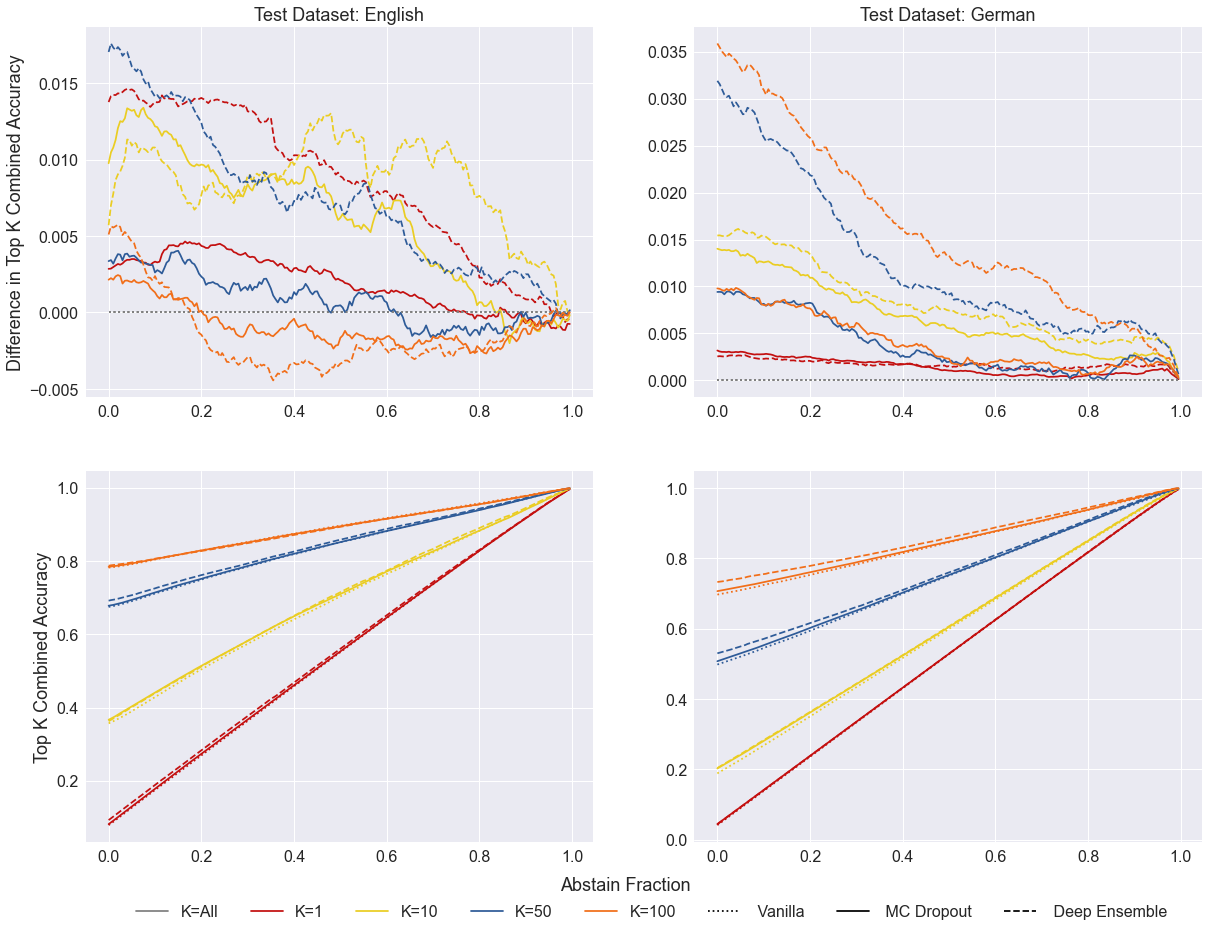

In [44]:
plot_accuracy_text_diff()

# Precision Recall

In [242]:
def plot_precision_recall_text(K=[1,10,50,100], mc_dropout_ensembles=100, deep_ensembles=10):
    fig = plt.figure(figsize=(20, 9.5))
    fig.tight_layout()

    plt.subplot(1, 2, 1)
    
    for i, x in enumerate(K):
        plt.plot(MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["Abstain Fraction"][1:], MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["AbstainPrecision_Softmax"][1:], color=colors[i], label="K="+str(MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["K"].iloc[0]) + "& MC Dropout", linestyle="-")
        plt.plot(Deep_Ensemble_dfs_combined[x][deep_ensembles]["Abstain Fraction"][1:], Deep_Ensemble_dfs_combined[x][deep_ensembles]["AbstainPrecision_Softmax"][1:], color=colors[i], label= "K=" +str(Deep_Ensemble_dfs_combined[x][deep_ensembles]["K"].iloc[0]) + "& Deep Ensemble", linestyle="--")
        plt.plot(Vanilla_dfs_combined[x]["Abstain Fraction"][1:], Vanilla_dfs_combined[x]["AbstainPrecision_Softmax"][1:], color=colors[i], label="K="+str(Vanilla_dfs_combined[x]["K"].iloc[0]) + "& Vanilla", linestyle=":")
        plt.plot(Random_Class_dfs_combined[x]["Abstain Fraction"][1:], Random_Class_dfs_combined[x]["AbstainPrecision_Random"][1:], color=colors[i], label="K="+str(Random_Class_dfs_combined[x]["K"].iloc[0]) + "& Random", linestyle="-.")
        plt.title("Test Dataset: English")
        plt.ylabel('Review Efficiency (Precision)')
        #plt.xlabel('Abstain Fraction')

          
    plt.subplot(1, 2, 2)
    
    for i, x in enumerate(K):
        plt.plot(MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["Abstain Fraction"][1:], MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["AbstainPrecision_Softmax"][1:], color=colors[i], label="K="+str(MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["K"].iloc[0]) + "& MC Dropout", linestyle="-")
        plt.plot(Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["Abstain Fraction"][1:], Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["AbstainPrecision_Softmax"][1:], color=colors[i], label= "K=" +str(Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["K"].iloc[0]) + "& Deep Ensemble", linestyle="--")
        plt.plot(Vanilla_dfs_combined_german[x]["Abstain Fraction"][1:], Vanilla_dfs_combined_german[x]["AbstainPrecision_Softmax"][1:], color=colors[i], label="K="+str(Vanilla_dfs_combined_german[x]["K"].iloc[0]) + "& Vanilla", linestyle=":")
        plt.plot(Random_Class_dfs_combined[x]["Abstain Fraction"][1:], Random_Class_dfs_combined_german[x]["AbstainPrecision_Random"][1:], color=colors[i], label="K="+str(Random_Class_dfs_combined[x]["K"].iloc[0]) + "& Random", linestyle="-.")
        plt.title("Test Dataset: German")
        #plt.xlabel('Abstain Fraction')


    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    hand, labl = function_to_split(lines,labels,'&')


    keep_indices = list(range(10))
    lines = [lines[i] for i in keep_indices]
    labels = [labels[i] for i in keep_indices]

    fig.legend(hand, labl, loc='lower left', bbox_to_anchor=(0.127,0.000001), ncol=len(hand), bbox_transform=fig.transFigure)
    
    #fig.savefig("Precision OOD.pdf")
    
    fig.text(0.5, 0.06, 'Abstain Fraction', ha='center')
    #fig.text(0.07, 0.5, 'Top K  Combined Accuracy', va='center', rotation='vertical')

    fig.savefig('Precision OOD.pdf')


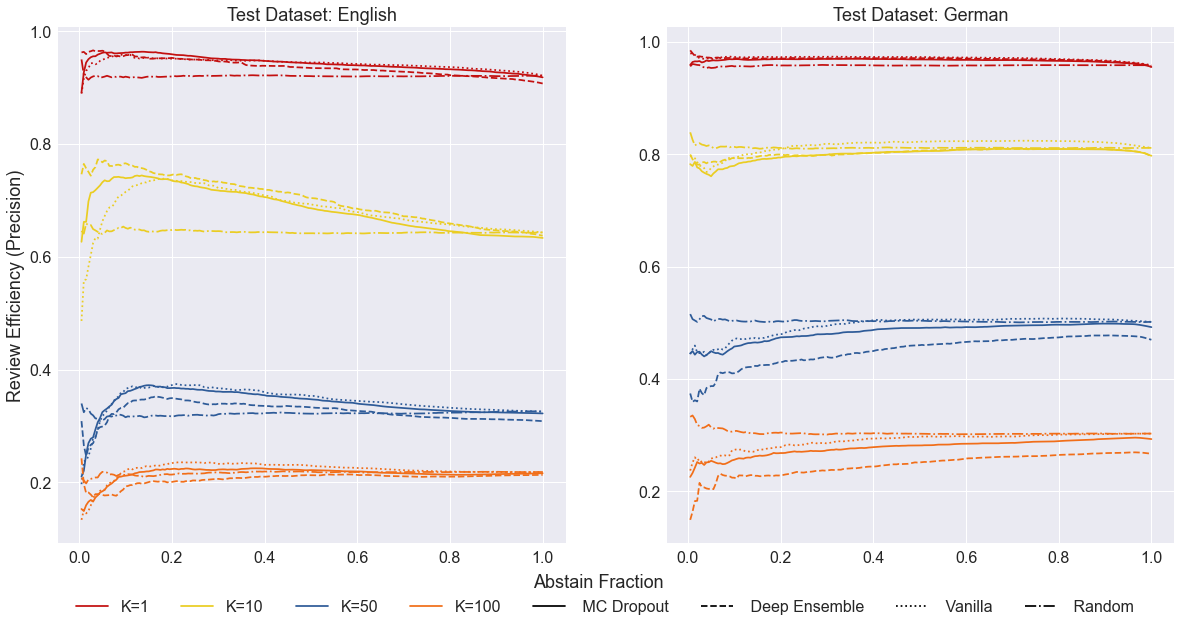

In [243]:
plot_precision_recall_text()

# Number Ensemble Members/ Dropout Passes

def function_to_split(hand,labl,dividor):

    Hand_L=[]
    Hand_M=[]
    Labl_L=[]
    Labl_M=[]

    for h,l in zip(hand,labl):
        co=h.get_color()
        ls=h.get_linestyle()
        lw=h.get_linewidth()
        mk=h.get_marker()
        mew=h.get_markeredgewidth()
        ms=h.get_markersize()

        LABS=l.split(dividor)

        if len(LABS) != 2:
            print('Split Legends Error: Only exactly 1 Dividor is accepted.')
            print ('Currently ' + str(len(LABS)-1) + ' dividors were given')
            return hand,labl

        #Line and Color
        LICO = plt.Line2D((0,1),(0,0), color=co, marker='',linewidth=lw)
        #Marker
        MARK = plt.Line2D((0,1),(0,0), color='k', marker=mk, markeredgewidth=mew, markersize=ms, linestyle=ls)

        if LABS[0] not in Labl_L:
            Hand_L.append(LICO)
            Labl_L.append(LABS[0])

        if LABS[1] not in Labl_M:
            Hand_M.append(MARK)
            Labl_M.append(LABS[1])

    return Hand_L+Hand_M,Labl_L+Labl_M

In [33]:
linestyles = ["-","--"]
linestyles_de = ["-",":"]
def plot_ensembles_text(K=[1,10,50,100], mc_dropout_ensembles=[3,100], deep_ensembles=[3,10]):
    fig = plt.figure(figsize=(20, 20))
    fig.tight_layout()


    plt.subplot(3, 2, 1)
    for i, x in enumerate(K):
        for n, j in enumerate(mc_dropout_ensembles):
            plt.plot(MC_Dropout_dfs_combined[x][j]["Abstain Fraction"], MC_Dropout_dfs_combined[x][j]["AbstainAccuracy_Softmax_Acc"], color=colors[i],linestyle=linestyles[n], label="K="+str(MC_Dropout_dfs_combined[x][j]["K"].iloc[0])+" & ensembles="+str(j))
            plt.title("English Dataset MC Dropout")
            plt.ylabel('Top K Model Accuracy')
            plt.xlim([0, 1])

    
    plt.subplot(3, 2, 2)
    for i, x in enumerate(K):
        for n, j in enumerate(mc_dropout_ensembles):
            plt.plot(MC_Dropout_dfs_combined_german[x][j]["Abstain Fraction"], MC_Dropout_dfs_combined_german[x][j]["AbstainAccuracy_Softmax_Acc"], color=colors[i],linestyle=linestyles[n], label="K="+str(MC_Dropout_dfs_combined_german[x][j]["K"].iloc[0])+" & ensembles="+str(j))
            plt.title("German Dataset MC Dropout")
            plt.xlim([0, 1])

    
    plt.subplot(3, 2, 3)
    for i, x in enumerate(K):
        for n, j in enumerate(deep_ensembles):
            plt.plot(Deep_Ensemble_dfs_combined[x][j]["Abstain Fraction"], Deep_Ensemble_dfs_combined[x][j]["AbstainAccuracy_Softmax_Acc"], color=colors[i],linestyle=linestyles_de[n], label="K="+str(Deep_Ensemble_dfs_combined[x][j]["K"].iloc[0])+" & ensembles="+str(j))
            plt.title("English Dataset Deep Ensemble")
            plt.ylabel('Top K Model Accuracy')
            plt.xlabel('Abstain Fraction')
            plt.xlim([0, 1])

    
    plt.subplot(3, 2, 4)
    for i, x in enumerate(K):
        for n, j in enumerate(deep_ensembles):
            plt.plot(Deep_Ensemble_dfs_combined_german[x][j]["Abstain Fraction"], Deep_Ensemble_dfs_combined_german[x][j]["AbstainAccuracy_Softmax_Acc"], color=colors[i],linestyle=linestyles_de[n], label="K="+str(Deep_Ensemble_dfs_combined[x][j]["K"].iloc[0])+" & ensembles="+str(j))
            plt.title("German Dataset Deep Ensemble")
            plt.xlabel('Abstain Fraction')
            plt.xlim([0, 1])

    
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    hand, labl = function_to_split(lines,labels,'&')

    keep_indices = list(range(10))
    lines = [lines[i] for i in keep_indices]
    labels = [labels[i] for i in keep_indices]

    fig.legend(hand, labl, loc='lower left', bbox_to_anchor=(0.25,0.32), ncol=len(hand), bbox_transform=fig.transFigure)

    fig.savefig("number ensembles cross lingual.pdf")

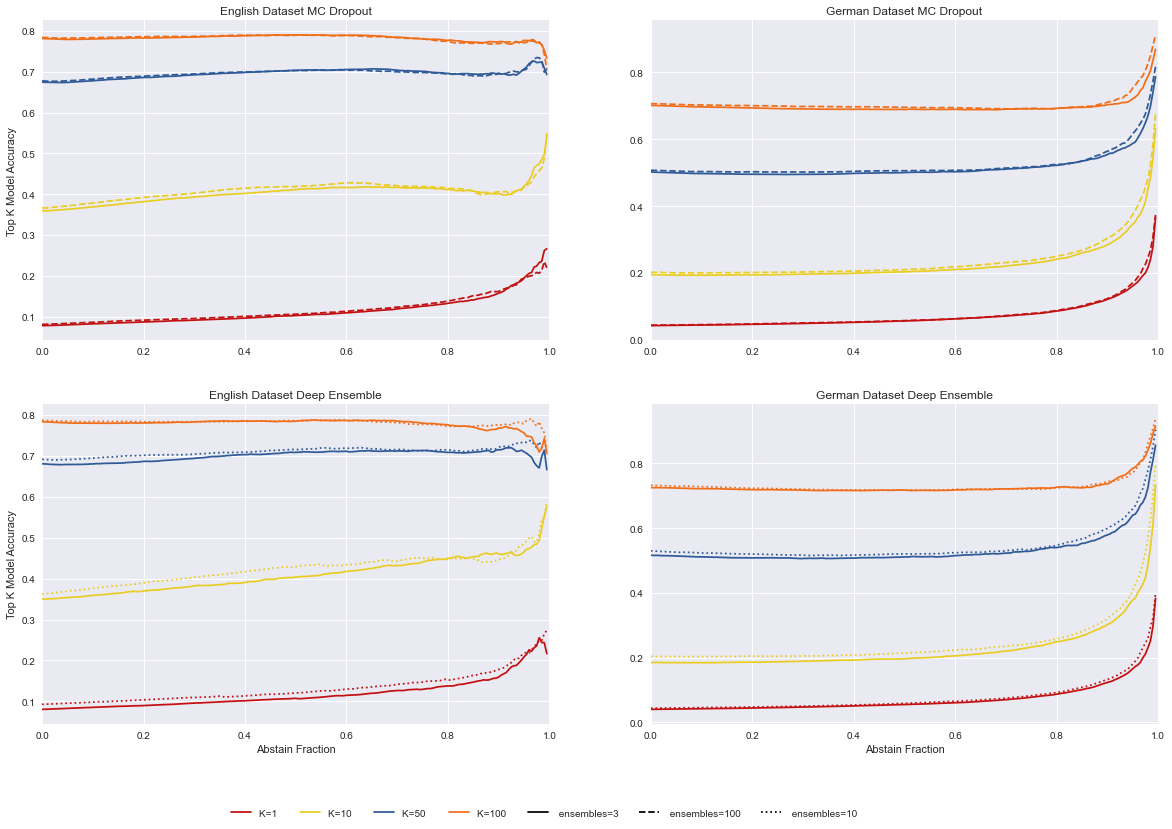

In [34]:
plot_ensembles_text()

In [45]:
cols = ['AbstainAccuracy_Softmax_Acc', 'min_AbstainAccuracy_Softmax_Acc','max_AbstainAccuracy_Softmax_Acc',"AbstainAccuracy_Softmax_CombinedAcc","min_AbstainAccuracy_Softmax_CombinedAcc","max_AbstainAccuracy_Softmax_CombinedAcc",'AbstainAccuracy_Variance_Acc', 'min_AbstainAccuracy_Variance_Acc','max_AbstainAccuracy_Variance_Acc',"AbstainAccuracy_Variance_CombinedAcc","min_AbstainAccuracy_Variance_CombinedAcc","max_AbstainAccuracy_Variance_CombinedAcc",'AbstainAccuracy_BALD_Acc', 'min_AbstainAccuracy_BALD_Acc','max_AbstainAccuracy_BALD_Acc',"AbstainAccuracy_BALD_CombinedAcc","min_AbstainAccuracy_BALD_CombinedAcc","max_AbstainAccuracy_BALD_CombinedAcc"]

In [46]:
MC_Dropout_dfs_combined_diff = {}
for i, j in MC_Dropout_dfs_combined.items():
    #print(i)
    baseline = j[3].reset_index(drop=True)
    MC_Dropout_dfs_combined_diff[i] = {k:v.loc[:,cols].reset_index(drop=True).subtract(baseline.loc[:,cols].reset_index(drop=True), axis=1) for (k, v) in j.items()}


In [47]:
MC_Dropout_dfs_combined_german_diff = {}
for i, j in MC_Dropout_dfs_combined_german.items():
    #print(i)
    baseline = j[3].reset_index(drop=True)
    MC_Dropout_dfs_combined_german_diff[i] = {k:v.loc[:,cols].reset_index(drop=True).subtract(baseline.loc[:,cols].reset_index(drop=True), axis=1) for (k, v) in j.items()}


In [48]:
Deep_Ensemble_dfs_combined_diff = {}
for i, j in Deep_Ensemble_dfs_combined.items():
    #print(i)
    baseline = j[3].reset_index(drop=True)
    Deep_Ensemble_dfs_combined_diff[i] = {k:v.loc[:,cols].reset_index(drop=True).subtract(baseline.loc[:,cols].reset_index(drop=True), axis=1) for (k, v) in j.items()}


In [49]:
Deep_Ensemble_dfs_combined_german_diff = {}
for i, j in Deep_Ensemble_dfs_combined_german.items():
    #print(i)
    baseline = j[3].reset_index(drop=True)
    Deep_Ensemble_dfs_combined_german_diff[i] = {k:v.loc[:,cols].reset_index(drop=True).subtract(baseline.loc[:,cols].reset_index(drop=True), axis=1) for (k, v) in j.items()}


def function_to_split(hand,labl,dividor):

    Hand_L=[]
    Hand_M=[]
    Labl_L=[]
    Labl_M=[]

    for h,l in zip(hand,labl):
        co=h.get_color()
        ls=h.get_linestyle()
        lw=h.get_linewidth()
        mk=h.get_marker()
        mew=h.get_markeredgewidth()
        ms=h.get_markersize()

        LABS=l.split(dividor)

        if len(LABS) != 2:
            print('Split Legends Error: Only exactly 1 Dividor is accepted.')
            print ('Currently ' + str(len(LABS)-1) + ' dividors were given')
            return hand,labl

        #Line and Color
        LICO = plt.Line2D((0,1),(0,0), color=co, marker='',linewidth=lw)
        #print(co)
        #Marker
        MARK = plt.Line2D((0,1),(0,0), color='k', marker=mk, markeredgewidth=mew, markersize=ms, linestyle=ls)

        if LABS[0] not in Labl_L:
            Hand_L.append(LICO)
            Labl_L.append(LABS[0])

        if LABS[1] not in Labl_M:
            Hand_M.append(MARK)
            Labl_M.append(LABS[1])

    return Hand_L+Hand_M,Labl_L+Labl_M

In [50]:
#colors_baseline = [(195/255,16/255,16/255),(234/255,205/255,35/255),(46/255,91/255,152/255),(241/255,110/255,25/255),(109/255,202/255,37/255),(105/255,72/255,111/255)]

In [59]:
linestyles = ["-","--",'-.',":"]
linestyles_de = ["-","--",'-.',":"]
def plot_ensembles_text(K=[1,10,50,100], mc_dropout_ensembles=[3,100], deep_ensembles=[3,10]):
    fig = plt.figure(figsize=(20, 15))
    fig.tight_layout()


    plt.subplot(2, 2, 1)
    for i, x in enumerate(K):
        for n, j in enumerate(mc_dropout_ensembles):
            if n != 0:
                plt.plot(MC_Dropout_dfs_combined[x][j]["Abstain Fraction"], MC_Dropout_dfs_combined_diff[x][j]["AbstainAccuracy_Softmax_CombinedAcc"], color=colors[i],linestyle=linestyles[1], label="K="+str(MC_Dropout_dfs_combined[x][j]["K"].iloc[0]) + "& Passes/Members=" + str(j))
            else:
                plt.plot(MC_Dropout_dfs_combined[x][j]["Abstain Fraction"], MC_Dropout_dfs_combined_diff[x][j]["AbstainAccuracy_Softmax_CombinedAcc"], color="grey",linestyle=linestyles[0], label="K=All" + "& Passes/Members=" + str(j))
    plt.title("MC Dropout - Test Dataset: English")
    #plt.ylabel('Difference in Top K Combined Accuracy')
    plt.xlim([0, 1])


    
    plt.subplot(2, 2, 3)
    for i, x in enumerate(K):
        for n, j in enumerate(mc_dropout_ensembles):
            if n != 0:
                plt.plot(MC_Dropout_dfs_combined_german[x][j]["Abstain Fraction"], MC_Dropout_dfs_combined_german_diff[x][j]["AbstainAccuracy_Softmax_CombinedAcc"],linestyle=linestyles[1], color=colors[i], label="K="+str(MC_Dropout_dfs_combined_german[x][j]["K"].iloc[0]) + "& Passes/Members=" + str(j))
            else:
                plt.plot(MC_Dropout_dfs_combined_german[x][j]["Abstain Fraction"], MC_Dropout_dfs_combined_german_diff[x][j]["AbstainAccuracy_Softmax_CombinedAcc"], color="grey",linestyle=linestyles[0], label="K=All" + "& Passes/Members=" + str(j))
    plt.title("MC Dropout - Test Dataset: German")
    #plt.xlabel('Abstain Fraction')
    #plt.ylabel('Difference in Top K Combined Accuracy')
    plt.xlim([0, 1])

    
    plt.subplot(2, 2, 2)
    for i, x in enumerate(K):
        for n, j in enumerate(deep_ensembles):
            if n != 0:
                plt.plot(Deep_Ensemble_dfs_combined[x][j]["Abstain Fraction"], Deep_Ensemble_dfs_combined_diff[x][j]["AbstainAccuracy_Softmax_CombinedAcc"],linestyle=linestyles[2], color=colors[i], label="K="+str(Deep_Ensemble_dfs_combined[x][j]["K"].iloc[0]) + "& Passes/Members=" + str(j))
            else:
                plt.plot(Deep_Ensemble_dfs_combined[x][j]["Abstain Fraction"], Deep_Ensemble_dfs_combined_diff[x][j]["AbstainAccuracy_Softmax_CombinedAcc"], color="grey",linestyle=linestyles_de[0], label="K=All"+ "& Passes/Members=" + str(j))
    plt.title("Deep Ensemble - Test Dataset: English")
    plt.xlim([0, 1])

    
    plt.subplot(2, 2, 4)
    for i, x in enumerate(K):
        for n, j in enumerate(deep_ensembles):
            if n != 0:
                plt.plot(Deep_Ensemble_dfs_combined_german[x][j]["Abstain Fraction"], Deep_Ensemble_dfs_combined_german_diff[x][j]["AbstainAccuracy_Softmax_CombinedAcc"], color=colors[i],linestyle=linestyles[2], label="K="+str(Deep_Ensemble_dfs_combined[x][j]["K"].iloc[0]) + "& Passes/Members=" + str(j) )
            else:
                plt.plot(Deep_Ensemble_dfs_combined_german[x][j]["Abstain Fraction"], Deep_Ensemble_dfs_combined_german_diff[x][j]["AbstainAccuracy_Softmax_CombinedAcc"], color="grey",linestyle=linestyles_de[0], label="K=All" + "& Passes/Members=" + str(j) )
    plt.title("Deep Ensemble - Test Dataset: German")
    #plt.xlabel('Abstain Fraction')
    plt.xlim([0, 1])



    
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    hand, labl = function_to_split(lines,labels,'&')

    keep_indices = list(range(10))
    lines = [lines[i] for i in keep_indices]
    labels = [labels[i] for i in keep_indices]

    fig.legend(hand, labl, loc='lower left', bbox_to_anchor=(0.3,0.01), ncol=4, bbox_transform=fig.transFigure)

    
    fig.text(0.5, 0.08, 'Abstain Fraction', ha='center')
    fig.text(0.07, 0.5, 'Difference in Top K Combined Accuracy', va='center', rotation='vertical')
    fig.savefig("number ensembles cross lingual all Softmax.pdf")

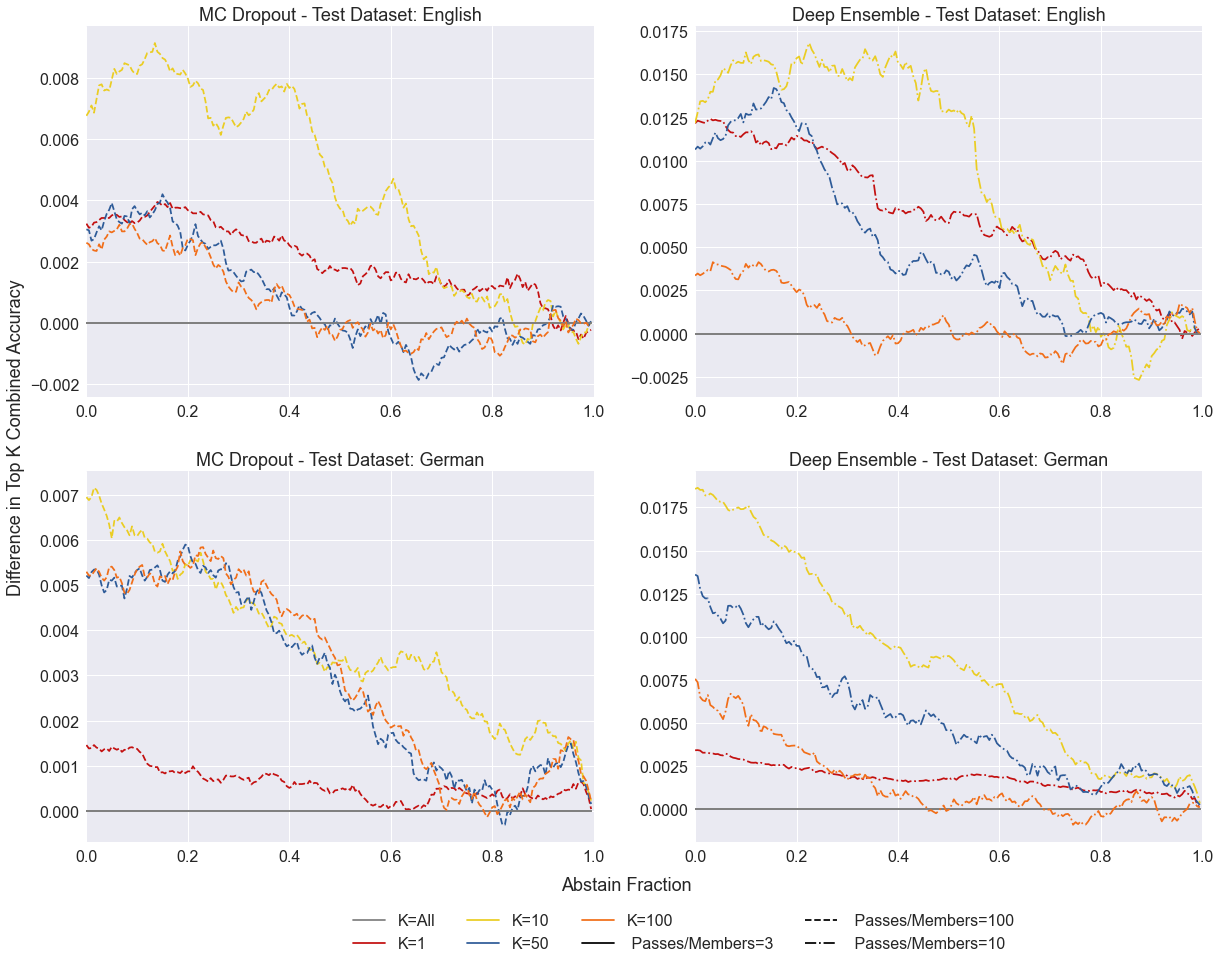

In [60]:
plot_ensembles_text()

In [252]:
linestyles = ["-","--",'-.',":"]
linestyles_de = ["-","--",'-.',":"]
def plot_ensembles_text_K1(K=[1], mc_dropout_ensembles=[3,100], deep_ensembles=[3,10]):
    fig = plt.figure(figsize=(20, 15))
    fig.tight_layout()


    plt.subplot(2, 2, 1)
    for i, x in enumerate(K):
        for n, j in enumerate(mc_dropout_ensembles):
            if n != 0:
                plt.plot(MC_Dropout_dfs_combined[x][j]["Abstain Fraction"], MC_Dropout_dfs_combined_diff[x][j]["AbstainAccuracy_Softmax_CombinedAcc"], color=list(reversed(colors))[n-1],linestyle=linestyles[0], label="Passes=" + str(j))
            else:
                plt.plot(MC_Dropout_dfs_combined[x][j]["Abstain Fraction"], MC_Dropout_dfs_combined_diff[x][j]["AbstainAccuracy_Softmax_CombinedAcc"], color="grey",linestyle=linestyles[0], label="Passes=" + str(j))
            #print(i)
    plt.title("MC Dropout - Test Dataset: English")
    #plt.ylabel('Difference in Top K Combined Accuracy')
    plt.xlim([0, 1])
        
    
    #plt.legend(loc='upper right')
    
    plt.subplot(2, 2, 3)

    for i, x in enumerate(K):
        for n, j in enumerate(mc_dropout_ensembles):
            if n != 0:
                plt.plot(MC_Dropout_dfs_combined_german[x][j]["Abstain Fraction"], MC_Dropout_dfs_combined_german_diff[x][j]["AbstainAccuracy_Softmax_CombinedAcc"],linestyle=linestyles[0], color=list(reversed(colors))[n-1], label="Passes=" + str(j))
            else:
                plt.plot(MC_Dropout_dfs_combined_german[x][j]["Abstain Fraction"], MC_Dropout_dfs_combined_german_diff[x][j]["AbstainAccuracy_Softmax_CombinedAcc"], color="grey",linestyle=linestyles[0], label="Passes=" + str(j))
    plt.title("MC Dropout - Test Dataset: German")
    #plt.ylabel('Difference in Top K Combined Accuracy')
    #plt.xlabel('Abstain Fraction')
    plt.xlim([0, 1])
    #plt.legend(loc='upper right')
    
    
    plt.subplot(2, 2, 2)
    for i, x in enumerate(K):
        for n, j in enumerate(deep_ensembles):
            if n != 0:
                plt.plot(Deep_Ensemble_dfs_combined[x][j]["Abstain Fraction"], Deep_Ensemble_dfs_combined_diff[x][j]["AbstainAccuracy_Softmax_CombinedAcc"],linestyle=linestyles[0], color=list(reversed(colors))[n+1], label="Ensembles=" + str(j))
            else:
                plt.plot(Deep_Ensemble_dfs_combined[x][j]["Abstain Fraction"], Deep_Ensemble_dfs_combined_diff[x][j]["AbstainAccuracy_Softmax_CombinedAcc"], color="grey",linestyle=linestyles_de[0], label="Ensembles=" + str(j))
    plt.title("Deep Ensemble - Test Dataset: English")
    plt.xlim([0, 1])
    #plt.legend(loc='upper right')
    
    
    plt.subplot(2, 2, 4)
    for i, x in enumerate(K):
        for n, j in enumerate(deep_ensembles):
            if n != 0:
                plt.plot(Deep_Ensemble_dfs_combined_german[x][j]["Abstain Fraction"], Deep_Ensemble_dfs_combined_german_diff[x][j]["AbstainAccuracy_Softmax_CombinedAcc"], color=list(reversed(colors))[n+1],linestyle=linestyles[0], label="Ensembles=" + str(j))
            else:
                plt.plot(Deep_Ensemble_dfs_combined_german[x][j]["Abstain Fraction"], Deep_Ensemble_dfs_combined_german_diff[x][j]["AbstainAccuracy_Softmax_CombinedAcc"], color="grey",linestyle=linestyles_de[0], label="Ensembles=" + str(j))
    plt.title("Deep Ensemble - Test Dataset: German")
    #plt.xlabel('Abstain Fraction')
    plt.xlim([0, 1])
    #fig.legend(hand, labl, loc='lower left', bbox_to_anchor=(0.1,0.03), ncol=len(hand), bbox_transform=fig.transFigure)

    
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    #hand, labl = function_to_split(lines,labels,'&')

    #print(hand)
    
    print(labels)

    keep_indices = list(range(7))

    labels_ensemble = labels[14:19]
    labels = [labels[i] for i in keep_indices]
    
    fig.legend(labels, loc='lower left', bbox_to_anchor=(0.13,0.0005), ncol=3, bbox_transform=fig.transFigure)
    fig.legend(lines[14:19],labels_ensemble, loc='lower left', bbox_to_anchor=(0.53,0.02), ncol=3, bbox_transform=fig.transFigure)
    
    fig.text(0.5, 0.08, 'Abstain Fraction', ha='center')
    fig.text(0.065, 0.5, 'Difference in Top 1 Combined Accuracy', va='center', rotation='vertical')
    fig.savefig("number ensembles cross lingual top1 Softmax.pdf")

['Passes=3', 'Passes=10', 'Passes=20', 'Passes=40', 'Passes=60', 'Passes=80', 'Passes=100', 'Passes=3', 'Passes=10', 'Passes=20', 'Passes=40', 'Passes=60', 'Passes=80', 'Passes=100', 'Ensembles=3', 'Ensembles=4', 'Ensembles=6', 'Ensembles=8', 'Ensembles=10', 'Ensembles=3', 'Ensembles=4', 'Ensembles=6', 'Ensembles=8', 'Ensembles=10']


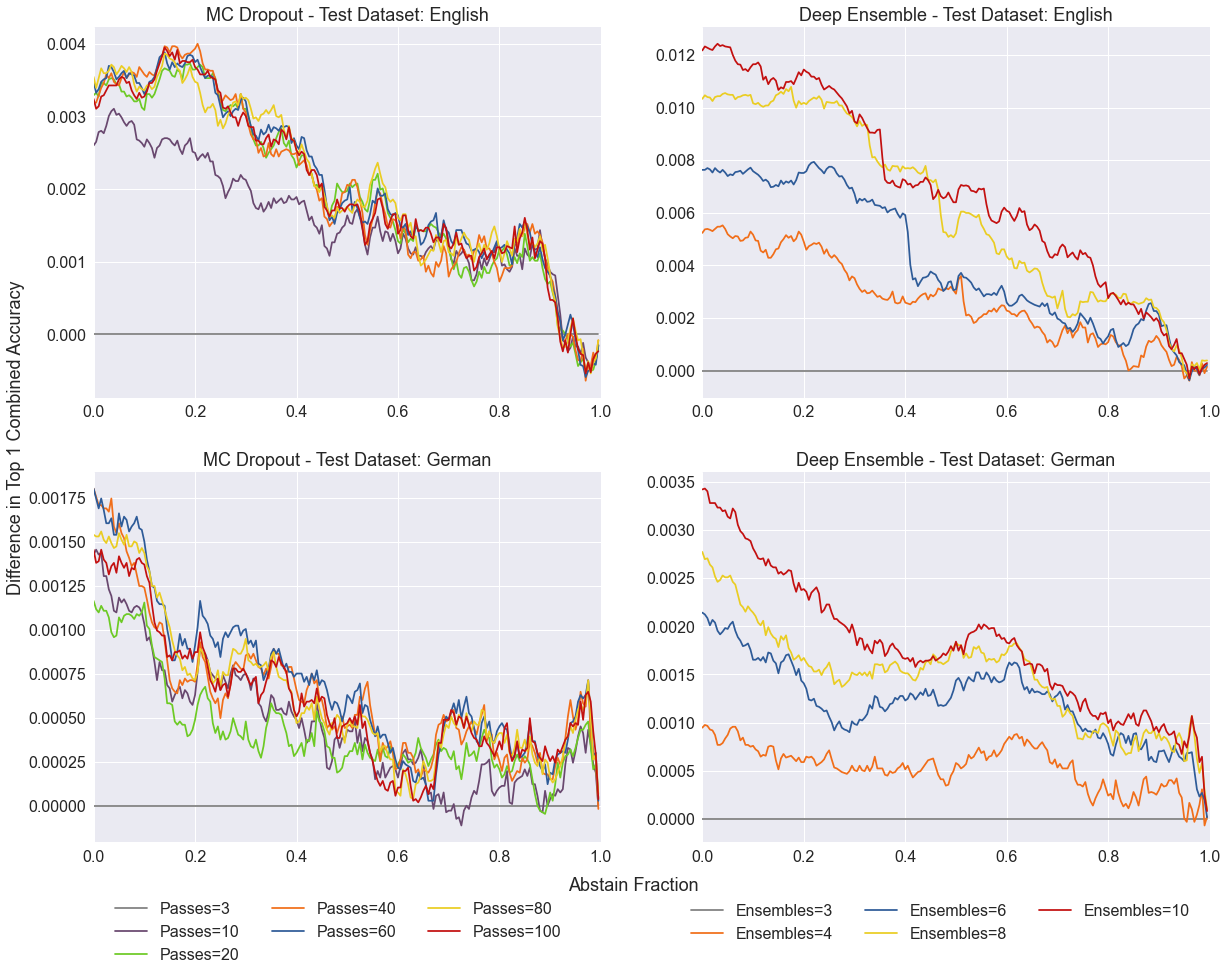

In [253]:
plot_ensembles_text_K1(K=[1],mc_dropout_ensembles=[3,10,20,40,60,80,100], deep_ensembles=[3,4,6,8,10])

# Confidence Scores

In [63]:
linestyles = ["-","--",":"]
def plot_acquisition_f_text(K=[1,10,50,100],mc_dropout_ensembles=100, deep_ensembles=10):
    fig = plt.figure(figsize=(20, 15))
    fig.tight_layout()


    plt.subplot(3, 2, 1)
    for i, x in enumerate(K):
        baseline = MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"][:-1]
        plt.plot(MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["Abstain Fraction"][:-1], MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"][:-1]-baseline, color="grey",linestyle="-", label="K=All"+" & Softmax")
        plt.plot(MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["Abstain Fraction"][:-1], MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["AbstainAccuracy_Variance_CombinedAcc"][:-1]-baseline, color=colors[i],linestyle="--", label="K="+str(MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["K"].iloc[0])+" & Variance")

        plt.plot(MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["Abstain Fraction"][:-1], MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["AbstainAccuracy_BALD_CombinedAcc"][:-1]-baseline, color=colors[i],linestyle=":", label="K="+str(MC_Dropout_dfs_combined[x][mc_dropout_ensembles]["K"].iloc[0])+" & BALD")
        plt.title("MC Dropout - Test Dataset: English")
        #plt.ylabel('Difference in Top K Combined Accuracy')

        
    plt.subplot(3, 2, 3)
    for i, x in enumerate(K):
        baseline_german = MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"][:-1]
        plt.plot(MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["Abstain Fraction"][:-1], MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"][:-1] - baseline_german, color="grey",linestyle="-", label="K=All"+" & Softmax")
        plt.plot(MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["Abstain Fraction"][:-1], MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["AbstainAccuracy_Variance_CombinedAcc"][:-1] - baseline_german, color=colors[i],linestyle="--", label="K="+str(MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["K"].iloc[0])+" & Variance")
        plt.plot(MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["Abstain Fraction"][:-1], MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["AbstainAccuracy_BALD_CombinedAcc"][:-1] - baseline_german, color=colors[i],linestyle=":", label="K="+str(MC_Dropout_dfs_combined_german[x][mc_dropout_ensembles]["K"].iloc[0])+" & BALD")
        plt.title("MC Dropout - Test Dataset: German")
        #plt.xlabel('Abstain Fraction')
        #plt.ylabel('Difference in Top K Combined Accuracy')

        
    plt.subplot(3, 2, 2)
    for i, x in enumerate(K):
        baseline= Deep_Ensemble_dfs_combined[x][deep_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"][:-1]
        plt.plot(Deep_Ensemble_dfs_combined[x][deep_ensembles]["Abstain Fraction"][:-1], Deep_Ensemble_dfs_combined[x][deep_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"][:-1] - baseline, color="grey",linestyle="-", label="K=All"+" & Softmax")
        plt.plot(Deep_Ensemble_dfs_combined[x][deep_ensembles]["Abstain Fraction"][:-1], Deep_Ensemble_dfs_combined[x][deep_ensembles]["AbstainAccuracy_Variance_CombinedAcc"][:-1] - baseline, color=colors[i],linestyle="--", label="K="+str(Deep_Ensemble_dfs_combined[x][deep_ensembles]["K"].iloc[0])+" & Variance")
        plt.plot(Deep_Ensemble_dfs_combined[x][deep_ensembles]["Abstain Fraction"][:-1], Deep_Ensemble_dfs_combined[x][deep_ensembles]["AbstainAccuracy_BALD_CombinedAcc"][:-1] - baseline, color=colors[i],linestyle=":", label="K="+str(Deep_Ensemble_dfs_combined[x][deep_ensembles]["K"].iloc[0])+" & BALD")
        plt.title("Deep Ensemble - Test Dataset: English")

        
    plt.subplot(3, 2, 4)
    for i, x in enumerate(K):
        baseline_german = Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"][:-1]
        plt.plot(Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["Abstain Fraction"][:-1], Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["AbstainAccuracy_Softmax_CombinedAcc"][:-1] - baseline_german, color="grey",linestyle="-", label="K=All"+" & Softmax")
        plt.plot(Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["Abstain Fraction"][:-1], Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["AbstainAccuracy_Variance_CombinedAcc"][:-1] - baseline_german, color=colors[i],linestyle="--", label="K="+str(Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["K"].iloc[0])+" & Variance")
        plt.plot(Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["Abstain Fraction"][:-1], Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["AbstainAccuracy_BALD_CombinedAcc"][:-1] - baseline_german, color=colors[i],linestyle=":", label="K="+str(Deep_Ensemble_dfs_combined_german[x][deep_ensembles]["K"].iloc[0])+" & BALD")
        plt.title("Deep Ensemble - Test Dataset: German")
        #plt.xlabel('Abstain Fraction')

    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    hand, labl = function_to_split(lines,labels,'&')
    
    #print(hand)

    keep_indices = list(range(10))
    lines = [lines[i] for i in keep_indices]
    labels = [labels[i] for i in keep_indices]


    fig.legend(hand, labl, loc='lower left', bbox_to_anchor=(0.15,0.3), ncol=len(hand), bbox_transform=fig.transFigure)
    fig.text(0.5, 0.35, 'Abstain Fraction', ha='center')
    fig.text(0.065, 0.66, 'Difference in Top K Combined Accuracy', va='center', rotation='vertical')
    fig.savefig("Acquisition Functions Zero-Shot.pdf")

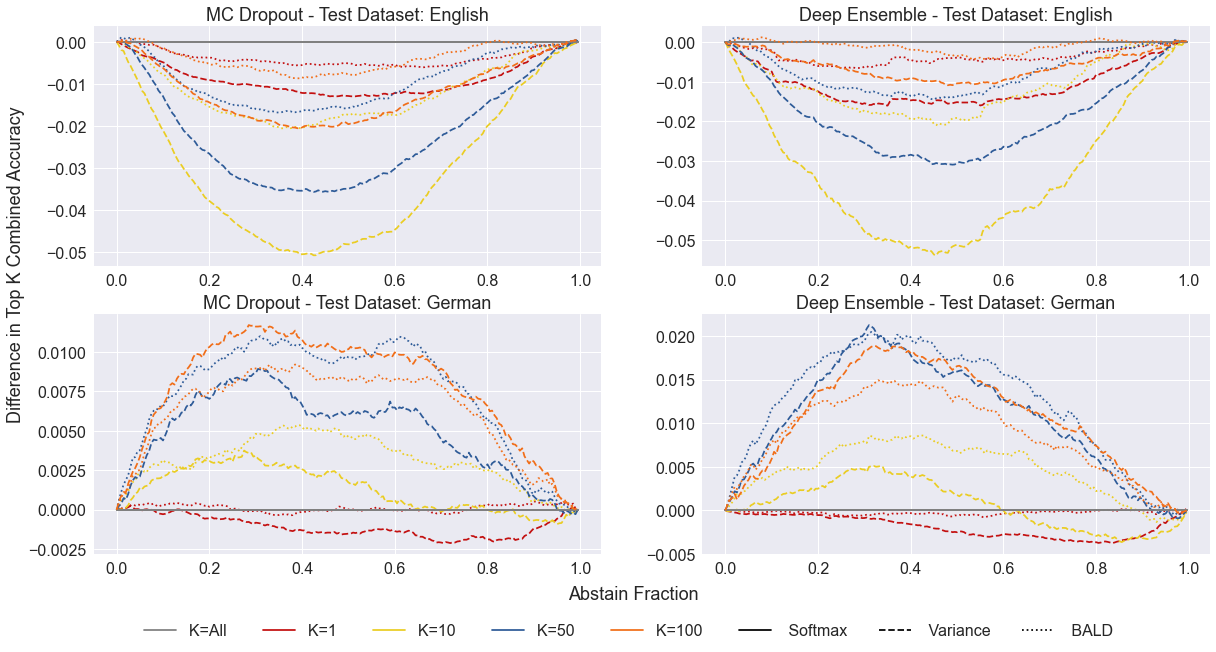

In [64]:
plot_acquisition_f_text()

# Additional Calibration Metrics

In [51]:
def create_table(df):
    df.head()
    df.drop_duplicates(subset=["num_ensemble","K"], inplace=True)
    '''
    df.drop(columns=["Abstain Fraction",'AbstainAccuracy_Softmax_Acc', 'AbstainAccuracy_Softmax_CombinedAcc',
       'AbstainAccuracy_Variance_Acc', 'AbstainAccuracy_Variance_CombinedAcc',
       'AbstainAccuracy_BALD_Acc', 'AbstainAccuracy_BALD_CombinedAcc',
       'AbstainPrecision_Softmax', 'AbstainPrecision_Variance',
       'AbstainPrecision_BALD', 'AbstainRecall_Softmax',
       'AbstainRecall_Variance', 'AbstainRecall_BALD'],inplace=True)
    '''
    df["num_ensemble"] = df["num_ensemble"].astype(int)
    df.sort_values("num_ensemble")
    df = df.set_index(["num_ensemble"])
    df.sort_index(inplace=True, level="num_ensemble")
    
    return df

In [52]:
MCDropout_df_combined = create_table(MCDropout_df_combined)
DeepEnsemble_df_combined = create_table(DeepEnsemble_df_combined)
Vanilla_df_combined = create_table(Vanilla_df_combined)
RandomClass_df_combined = create_table(Random_Class_df_combined)

In [53]:
MCDropout_df_combined_german = create_table(MCDropout_df_combined_german)
DeepEnsemble_df_combined_german = create_table(DeepEnsemble_df_combined_german)
Vanilla_df_combined_german = create_table(Vanilla_df_combined_german)
RandomClass_df_combined_german = create_table(Random_Class_df_combined_german)

In [54]:
groupbyobject_MC = MCDropout_df_combined.groupby("K")
groupbyobject_DE = DeepEnsemble_df_combined.groupby("K")
groupbyobject_VA = Vanilla_df_combined.groupby("K")
groupbyobject_RC = Random_Class_df_combined.groupby("K")
groups = [1,3,5,10,20,30,40,50,60,70,80,90,100]
MC_Dropout_ensembles = [3,5,10,20,30,40,50,60,70,80,90,100]
Deep_ensembles = [3,4,5]
MC_Dropout_dfs_combined = {1:None,3:None,5:None,10:None,20:None
       ,30:None,40:None,50:None,60:None,70:None
       ,80:None,90:None,100:None}

Deep_Ensemble_dfs_combined = {1:None,3:None,5:None,10:None,20:None
       ,30:None,40:None,50:None,60:None,70:None
       ,80:None,90:None,100:None}

Vanilla_dfs_combined = {1:None,3:None,5:None,10:None,20:None
       ,30:None,40:None,50:None,60:None,70:None
       ,80:None,90:None,100:None}

Random_Class_dfs_combined = {1:None,3:None,5:None,10:None,20:None
       ,30:None,40:None,50:None,60:None,70:None
       ,80:None,90:None,100:None}

for i in groups:
    MC_Dropout_dfs_combined[i] = groupbyobject_MC.get_group(i)
    Deep_Ensemble_dfs_combined[i] = groupbyobject_DE.get_group(i)
    Vanilla_dfs_combined[i] = groupbyobject_VA.get_group(i)
    Random_Class_dfs_combined[i] = groupbyobject_RC.get_group(i)


In [55]:
groupbyobject_MC_german = MCDropout_df_combined_german.groupby("K")
groupbyobject_DE_german = DeepEnsemble_df_combined_german.groupby("K")
groupbyobject_VA_german = Vanilla_df_combined_german.groupby("K")
groupbyobject_RC_german = Random_Class_df_combined_german.groupby("K")
groups_german = [1,3,5,10,20,30,40,50,60,70,80,90,100]
MC_Dropout_ensembles_german = [3,5,10,20,30,40,50,60,70,80,90,100]
Deep_ensembles_german = [3,4,5]
MC_Dropout_dfs_combined_german = {1:None,3:None,5:None,10:None,20:None
       ,30:None,40:None,50:None,60:None,70:None
       ,80:None,90:None,100:None}

Deep_Ensemble_dfs_combined_german = {1:None,3:None,5:None,10:None,20:None
       ,30:None,40:None,50:None,60:None,70:None
       ,80:None,90:None,100:None}

Vanilla_dfs_combined_german = {1:None,3:None,5:None,10:None,20:None
       ,30:None,40:None,50:None,60:None,70:None
       ,80:None,90:None,100:None}

Random_Class_dfs_combined_german = {1:None,3:None,5:None,10:None,20:None
       ,30:None,40:None,50:None,60:None,70:None
       ,80:None,90:None,100:None}

for i in groups_german:
    MC_Dropout_dfs_combined_german[i] = groupbyobject_MC_german.get_group(i)
    Deep_Ensemble_dfs_combined_german[i] = groupbyobject_DE_german.get_group(i)
    Vanilla_dfs_combined_german[i] = groupbyobject_VA_german.get_group(i)
    Random_Class_dfs_combined_german[i] = groupbyobject_RC_german.get_group(i)

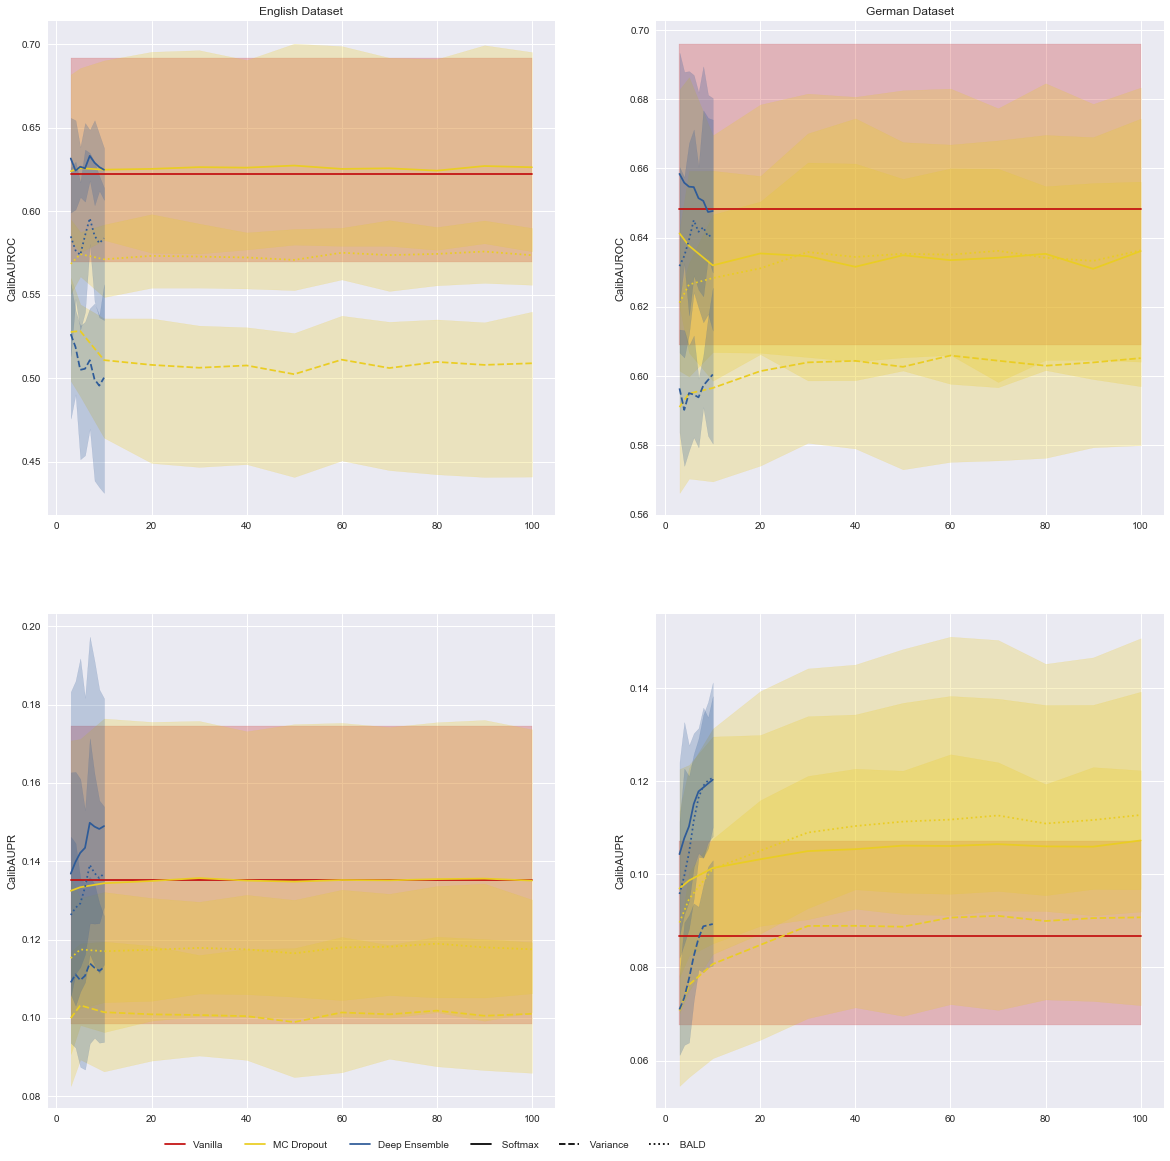

In [56]:
fig = plt.figure(figsize=(20, 20))
fig.tight_layout()






plt.subplot(2, 2, 1)
plt.axhline(y=Vanilla_dfs_combined[1]["CalibAUROC Softmax"].iloc[0], color=colors[0], linestyle='-',xmin=0.045,xmax=0.955, label="Vanilla & Softmax")
plt.fill_between(MC_Dropout_dfs_combined[1].index,Vanilla_dfs_combined[1]["min_CalibAUROC Softmax"],Vanilla_dfs_combined[1]["max_CalibAUROC Softmax"],color=colors[0],alpha=0.25)

plt.plot(MC_Dropout_dfs_combined[1].index, MC_Dropout_dfs_combined[1]["CalibAUROC Softmax"], color=colors[1],linestyle="-", label="MC Dropout & Softmax")
plt.fill_between(MC_Dropout_dfs_combined[1].index,MC_Dropout_dfs_combined[1]["min_CalibAUROC Softmax"],MC_Dropout_dfs_combined[1]["max_CalibAUROC Softmax"],color=colors[1],alpha=0.25)

plt.plot(MC_Dropout_dfs_combined[1].index, MC_Dropout_dfs_combined[1]["CalibAUROC Variance"], color=colors[1],linestyle="--", label="MC Dropout & Variance")
plt.fill_between(MC_Dropout_dfs_combined[1].index,MC_Dropout_dfs_combined[1]["min_CalibAUROC Variance"],MC_Dropout_dfs_combined[1]["max_CalibAUROC Variance"],color=colors[1],alpha=0.25)

plt.plot(MC_Dropout_dfs_combined[1].index, MC_Dropout_dfs_combined[1]["CalibAUROC BALD"], color=colors[1], linestyle=":", label="MC Dropout & BALD")
plt.fill_between(MC_Dropout_dfs_combined[1].index,MC_Dropout_dfs_combined[1]["min_CalibAUROC BALD"],MC_Dropout_dfs_combined[1]["max_CalibAUROC BALD"],color=colors[1],alpha=0.25)

plt.plot(Deep_Ensemble_dfs_combined[1].index, Deep_Ensemble_dfs_combined[1]["CalibAUROC Softmax"], color=colors[2],linestyle="-", label="Deep Ensemble & Softmax")
plt.fill_between(Deep_Ensemble_dfs_combined[1].index,Deep_Ensemble_dfs_combined[1]["min_CalibAUROC Softmax"],Deep_Ensemble_dfs_combined[1]["max_CalibAUROC Softmax"],color=colors[2],alpha=0.25)

plt.plot(Deep_Ensemble_dfs_combined[1].index, Deep_Ensemble_dfs_combined[1]["CalibAUROC Variance"], color=colors[2], linestyle="--", label="Deep Ensemble & Variance")
plt.fill_between(Deep_Ensemble_dfs_combined[1].index,Deep_Ensemble_dfs_combined[1]["min_CalibAUROC Variance"],Deep_Ensemble_dfs_combined[1]["max_CalibAUROC Variance"],color=colors[2],alpha=0.25)

plt.plot(Deep_Ensemble_dfs_combined[1].index, Deep_Ensemble_dfs_combined[1]["CalibAUROC BALD"], color=colors[2], linestyle=":", label="Deep Ensemble & BALD")
plt.fill_between(Deep_Ensemble_dfs_combined[1].index,Deep_Ensemble_dfs_combined[1]["min_CalibAUROC BALD"],Deep_Ensemble_dfs_combined[1]["max_CalibAUROC BALD"],color=colors[2],alpha=0.25)

#plt.axhline(y=Random_Class_dfs_combined[1]["CalibAUROC Random"].iloc[0], color=colors[3], linestyle='-',xmin=0.045,xmax=0.955,label= "Random & Softmax")
#plt.axhline(y=Random_Class_dfs_combined[1]["CalibAUROC Class"].iloc[0], color=colors[4], linestyle='-',xmin=0.045,xmax=0.955, label="Class & Softmax")
plt.title("English Dataset")
plt.ylabel('CalibAUROC')
#plt.legend(loc='lower right')

plt.subplot(2, 2, 2)
plt.axhline(y=Vanilla_dfs_combined_german[1]["CalibAUROC Softmax"].iloc[0], color=colors[0], linestyle='-',xmin=0.045,xmax=0.955, label="Vanilla & Softmax")
plt.fill_between(MC_Dropout_dfs_combined_german[1].index,Vanilla_dfs_combined_german[1]["min_CalibAUROC Softmax"],Vanilla_dfs_combined_german[1]["max_CalibAUROC Softmax"],color=colors[0],alpha=0.25)

plt.plot(MC_Dropout_dfs_combined_german[1].index, MC_Dropout_dfs_combined_german[1]["CalibAUROC Softmax"], color=colors[1],linestyle="-", label="MC Dropout & Softmax")
plt.fill_between(MC_Dropout_dfs_combined_german[1].index,MC_Dropout_dfs_combined_german[1]["min_CalibAUROC Softmax"],MC_Dropout_dfs_combined_german[1]["max_CalibAUROC Softmax"],color=colors[1],alpha=0.25)

plt.plot(MC_Dropout_dfs_combined_german[1].index, MC_Dropout_dfs_combined_german[1]["CalibAUROC Variance"], color=colors[1],linestyle="--", label="MC Dropout & Variance")
plt.fill_between(MC_Dropout_dfs_combined_german[1].index,MC_Dropout_dfs_combined_german[1]["min_CalibAUROC Variance"],MC_Dropout_dfs_combined_german[1]["max_CalibAUROC Variance"],color=colors[1],alpha=0.25)

plt.plot(MC_Dropout_dfs_combined_german[1].index, MC_Dropout_dfs_combined_german[1]["CalibAUROC BALD"], color=colors[1], linestyle=":", label="MC Dropout & BALD")
plt.fill_between(MC_Dropout_dfs_combined_german[1].index,MC_Dropout_dfs_combined_german[1]["min_CalibAUROC BALD"],MC_Dropout_dfs_combined_german[1]["max_CalibAUROC BALD"],color=colors[1],alpha=0.25)

plt.plot(Deep_Ensemble_dfs_combined_german[1].index, Deep_Ensemble_dfs_combined_german[1]["CalibAUROC Softmax"], color=colors[2],linestyle="-", label="Deep Ensemble & Softmax")
plt.fill_between(Deep_Ensemble_dfs_combined_german[1].index,Deep_Ensemble_dfs_combined_german[1]["min_CalibAUROC Softmax"],Deep_Ensemble_dfs_combined_german[1]["max_CalibAUROC Softmax"],color=colors[2],alpha=0.25)

plt.plot(Deep_Ensemble_dfs_combined_german[1].index, Deep_Ensemble_dfs_combined_german[1]["CalibAUROC Variance"], color=colors[2], linestyle="--", label="Deep Ensemble & Variance")
plt.fill_between(Deep_Ensemble_dfs_combined_german[1].index,Deep_Ensemble_dfs_combined_german[1]["min_CalibAUROC Variance"],Deep_Ensemble_dfs_combined_german[1]["max_CalibAUROC Variance"],color=colors[2],alpha=0.25)

plt.plot(Deep_Ensemble_dfs_combined_german[1].index, Deep_Ensemble_dfs_combined_german[1]["CalibAUROC BALD"], color=colors[2], linestyle=":", label="Deep Ensemble & BALD")
plt.fill_between(Deep_Ensemble_dfs_combined_german[1].index,Deep_Ensemble_dfs_combined_german[1]["min_CalibAUROC BALD"],Deep_Ensemble_dfs_combined_german[1]["max_CalibAUROC BALD"],color=colors[2],alpha=0.25)

#plt.axhline(y=Random_Class_dfs_combined_german[1]["CalibAUROC Random"].iloc[0], color=colors[3], linestyle='-',xmin=0.045,xmax=0.955,label= "Random & Softmax")
#plt.axhline(y=Random_Class_dfs_combined_german[1]["CalibAUROC Class"].iloc[0], color=colors[4], linestyle='-',xmin=0.045,xmax=0.955, label="Class & Softmax")
plt.title("German Dataset")
plt.ylabel('CalibAUROC')
#plt.legend(loc='lower right')

plt.subplot(2, 2, 3)
plt.axhline(y=Vanilla_df_combined["CalibAUPR Softmax"].iloc[0], color=colors[0], linestyle='-',xmin=0.045,xmax=0.955, label="Vanilla & Softmax")
plt.fill_between(MC_Dropout_dfs_combined[1].index,Vanilla_dfs_combined[1]["min_CalibAUPR Softmax"],Vanilla_dfs_combined[1]["max_CalibAUPR Softmax"],color=colors[0],alpha=0.25)

plt.plot(MC_Dropout_dfs_combined[1].index, MC_Dropout_dfs_combined[1]["CalibAUPR Softmax"], color=colors[1],linestyle="-", label="MC Dropout & Softmax")
plt.fill_between(MC_Dropout_dfs_combined[1].index,MC_Dropout_dfs_combined[1]["min_CalibAUPR Softmax"],MC_Dropout_dfs_combined[1]["max_CalibAUPR Softmax"],color=colors[1],alpha=0.25)

plt.plot(MC_Dropout_dfs_combined[1].index, MC_Dropout_dfs_combined[1]["CalibAUPR Variance"], color=colors[1], label="MC Dropout & Variance",linestyle="--")
plt.fill_between(MC_Dropout_dfs_combined[1].index,MC_Dropout_dfs_combined[1]["min_CalibAUPR Variance"],MC_Dropout_dfs_combined[1]["max_CalibAUPR Variance"],color=colors[1],alpha=0.25)

plt.plot(MC_Dropout_dfs_combined[1].index, MC_Dropout_dfs_combined[1]["CalibAUPR BALD"], color=colors[1], label="MC Dropout & BALD", linestyle=":")
plt.fill_between(MC_Dropout_dfs_combined[1].index,MC_Dropout_dfs_combined[1]["min_CalibAUPR BALD"],MC_Dropout_dfs_combined[1]["max_CalibAUPR BALD"],color=colors[1],alpha=0.25)

plt.plot(Deep_Ensemble_dfs_combined[1].index, Deep_Ensemble_dfs_combined[1]["CalibAUPR Softmax"], color=colors[2],linestyle="-", label="Deep Ensemble & Softmax")
plt.fill_between(Deep_Ensemble_dfs_combined[1].index,Deep_Ensemble_dfs_combined[1]["min_CalibAUPR Softmax"],Deep_Ensemble_dfs_combined[1]["max_CalibAUPR Softmax"],color=colors[2],alpha=0.25)

plt.plot(Deep_Ensemble_dfs_combined[1].index, Deep_Ensemble_dfs_combined[1]["CalibAUPR Variance"], color=colors[2], label="Deep Ensemble & Variance", linestyle="--")
plt.fill_between(Deep_Ensemble_dfs_combined[1].index,Deep_Ensemble_dfs_combined[1]["min_CalibAUPR Variance"],Deep_Ensemble_dfs_combined[1]["max_CalibAUPR Variance"],color=colors[2],alpha=0.25)

plt.plot(Deep_Ensemble_dfs_combined[1].index, Deep_Ensemble_dfs_combined[1]["CalibAUPR BALD"], color=colors[2], label="Deep Ensemble & BALD", linestyle=":")
plt.fill_between(Deep_Ensemble_dfs_combined[1].index,Deep_Ensemble_dfs_combined[1]["min_CalibAUPR BALD"],Deep_Ensemble_dfs_combined[1]["max_CalibAUPR BALD"],color=colors[2],alpha=0.25)
#plt.axhline(y=Random_Class_dfs_combined[1]["CalibAUPR Random"].iloc[0], color=colors[3], linestyle='-',xmin=0.045,xmax=0.955,label= "Random & Softmax")
#plt.axhline(y=Random_Class_dfs_combined[1]["CalibAUPR Class"].iloc[0], color=colors[4], linestyle='-',xmin=0.045,xmax=0.955, label="Class & Softmax")


plt.ylabel('CalibAUPR')
#plt.legend(loc='lower right')

plt.subplot(2, 2, 4)

plt.axhline(y=Vanilla_df_combined_german["CalibAUPR Softmax"].iloc[0], color=colors[0], linestyle='-',xmin=0.045,xmax=0.955, label="Vanilla & Softmax")
plt.fill_between(MC_Dropout_dfs_combined_german[1].index,Vanilla_dfs_combined_german[1]["min_CalibAUPR Softmax"],Vanilla_dfs_combined_german[1]["max_CalibAUPR Softmax"],color=colors[0],alpha=0.25)

plt.plot(MC_Dropout_dfs_combined_german[1].index, MC_Dropout_dfs_combined_german[1]["CalibAUPR Softmax"], color=colors[1],linestyle="-", label="MC Dropout & Softmax")
plt.fill_between(MC_Dropout_dfs_combined_german[1].index,MC_Dropout_dfs_combined_german[1]["min_CalibAUPR Softmax"],MC_Dropout_dfs_combined_german[1]["max_CalibAUPR Softmax"],color=colors[1],alpha=0.25)

plt.plot(MC_Dropout_dfs_combined_german[1].index, MC_Dropout_dfs_combined_german[1]["CalibAUPR Variance"], color=colors[1], label="MC Dropout & Variance",linestyle="--")
plt.fill_between(MC_Dropout_dfs_combined_german[1].index,MC_Dropout_dfs_combined_german[1]["min_CalibAUPR Variance"],MC_Dropout_dfs_combined_german[1]["max_CalibAUPR Variance"],color=colors[1],alpha=0.25)

plt.plot(MC_Dropout_dfs_combined_german[1].index, MC_Dropout_dfs_combined_german[1]["CalibAUPR BALD"], color=colors[1], label="MC Dropout & BALD", linestyle=":")
plt.fill_between(MC_Dropout_dfs_combined_german[1].index,MC_Dropout_dfs_combined_german[1]["min_CalibAUPR BALD"],MC_Dropout_dfs_combined_german[1]["max_CalibAUPR BALD"],color=colors[1],alpha=0.25)

plt.plot(Deep_Ensemble_dfs_combined_german[1].index, Deep_Ensemble_dfs_combined_german[1]["CalibAUPR Softmax"], color=colors[2],linestyle="-", label="Deep Ensemble & Softmax")
plt.fill_between(Deep_Ensemble_dfs_combined_german[1].index,Deep_Ensemble_dfs_combined_german[1]["min_CalibAUPR Softmax"],Deep_Ensemble_dfs_combined_german[1]["max_CalibAUPR Softmax"],color=colors[2],alpha=0.25)

plt.plot(Deep_Ensemble_dfs_combined_german[1].index, Deep_Ensemble_dfs_combined_german[1]["CalibAUPR Variance"], color=colors[2], label="Deep Ensemble & Variance", linestyle="--")
plt.fill_between(Deep_Ensemble_dfs_combined_german[1].index,Deep_Ensemble_dfs_combined_german[1]["min_CalibAUPR Variance"],Deep_Ensemble_dfs_combined_german[1]["max_CalibAUPR Variance"],color=colors[2],alpha=0.25)

plt.plot(Deep_Ensemble_dfs_combined_german[1].index, Deep_Ensemble_dfs_combined_german[1]["CalibAUPR BALD"], color=colors[2], label="Deep Ensemble & BALD", linestyle=":")
plt.fill_between(Deep_Ensemble_dfs_combined_german[1].index,Deep_Ensemble_dfs_combined_german[1]["min_CalibAUPR BALD"],Deep_Ensemble_dfs_combined_german[1]["max_CalibAUPR BALD"],color=colors[2],alpha=0.25)

#plt.axhline(y=Random_Class_dfs_combined_german[1]["CalibAUPR Random"].iloc[0], color=colors[3], linestyle='-',xmin=0.045,xmax=0.955,label= "Random & Softmax")
#plt.axhline(y=Random_Class_dfs_combined_german[1]["CalibAUPR Class"].iloc[0], color=colors[4], linestyle='-',xmin=0.045,xmax=0.955, label="Class & Softmax")

plt.ylabel('CalibAUPR')
#plt.legend(loc='lower right')


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
hand, labl = function_to_split(lines,labels,'&')

#print(hand)

keep_indices = list(range(10))
lines = [lines[i] for i in keep_indices]
labels = [labels[i] for i in keep_indices]



#print(labels)


#labels = list(OrderedDict.fromkeys(labels))


fig.legend(hand, labl, loc='lower left', bbox_to_anchor=(0.2,0.09), ncol=len(hand), bbox_transform=fig.transFigure)
#fig.savefig("Metrics OOD.pdf")